In [1]:
# =============================================
# IMPORTS POUR LES VISUALISATIONS ET GRAPHIQUES
# =============================================
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# PHASE 1 : CHARGEMENT ET COMPRÉHENSION

In [3]:
import pandas as pd
import numpy as np

# ============================================
# 1. CHARGEMENT DES DONNÉES
# ============================================
df = pd.read_csv("airlines_reviews_dynamic.csv", engine='python', on_bad_lines='warn')
print("✅ Données chargées avec succès")
print("=" * 100)

✅ Données chargées avec succès


# PHASE 2 : ANALYSE DES MÉTADONNÉES

In [4]:
# ============================================
# 1. APERÇU DES DONNÉES
# ============================================
print("\n👁️ APERÇU DES DONNÉES")
print("-" * 30)

print("A. Premières lignes :")
print(df.head().to_string())

print("\nB. Dernières lignes :")
print(df.tail().to_string())

print("\nC. Échantillon aléatoire (5 lignes) :")
print(df.sample(5, random_state=42).to_string())


👁️ APERÇU DES DONNÉES
------------------------------
A. Premières lignes :
           airline  rating                              header                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [5]:
# ============================================
# 2. EXPLORATION INITIALE
# ============================================
print("📊 EXPLORATION INITIALE")
print("-" * 30)

print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nColonnes disponibles ({len(df.columns)}) :")
for i, col in enumerate(df.columns, 1):
  #, 1 dans enumerate(df.columns, 1) est le paramètre start de la fonction enumerate()
  #Par défaut, enumerate() commence à compter à partir de 0
    print(f"  {i:2d}. {col}")

📊 EXPLORATION INITIALE
------------------------------
Dimensions du dataset : 50142 lignes × 17 colonnes

Colonnes disponibles (17) :
   1. airline
   2. rating
   3. header
   4. review
   5. Aircraft
   6. Type Of Traveller
   7. Seat Type
   8. Route
   9. Date Flown
  10. Seat Comfort
  11. Cabin Staff Service
  12. Ground Service
  13. Value For Money
  14. Recommended
  15. Food & Beverages
  16. Inflight Entertainment
  17. Wifi & Connectivity


In [6]:
# ============================================
# 3. MÉTADONNÉES ET TYPES DE DONNÉES
# ============================================
print("\n📋 MÉTADONNÉES")
print("-" * 30)

print("\nA. Types de données par colonne :")
#df.dtypes() retourne une Series pandas avec Index = noms des colonnes + Valeurs = types de données de chaque colonne
dtype_summary = df.dtypes.reset_index()
#.reset_index() transforme la Series en DataFrame: Convertissant l'index (noms de colonnes) en une colonne normale + Créant un nouvel index numérique (0, 1, 2...)
dtype_summary.columns = ['Colonne', 'Type'] #Renommage des colonnes (anciens index , 0)
print(dtype_summary.to_string(index=False))
#.to_string(index=False) formate le DataFrame en chaîne de caractères sans l'index
#===> Cette approche transforme une Series en DataFrame manipulable avec des colonnes claires.



📋 MÉTADONNÉES
------------------------------

A. Types de données par colonne :
               Colonne    Type
               airline  object
                rating float64
                header  object
                review  object
              Aircraft  object
     Type Of Traveller  object
             Seat Type  object
                 Route  object
            Date Flown  object
          Seat Comfort float64
   Cabin Staff Service float64
        Ground Service float64
       Value For Money float64
           Recommended  object
      Food & Beverages float64
Inflight Entertainment float64
   Wifi & Connectivity float64


In [7]:
print("\n📊 Types de données présents dans le dataset :")
print(dtype_summary['Type'].value_counts())


📊 Types de données présents dans le dataset :
Type
object     9
float64    8
Name: count, dtype: int64


In [8]:
# Trouver toutes les colonnes numériques
print("\nC. Colonnes numériques :")
print(dtype_summary[dtype_summary['Type'].isin([np.dtype('int64'), np.dtype('float64')])])

# Trouver les colonnes de type object
print("\nD. Colonnes de type object :")
print(dtype_summary[dtype_summary['Type'] == 'object'])


C. Colonnes numériques :
                   Colonne     Type
1                   rating  float64
9             Seat Comfort  float64
10     Cabin Staff Service  float64
11          Ground Service  float64
12         Value For Money  float64
14        Food & Beverages  float64
15  Inflight Entertainment  float64
16     Wifi & Connectivity  float64

D. Colonnes de type object :
              Colonne    Type
0             airline  object
2              header  object
3              review  object
4            Aircraft  object
5   Type Of Traveller  object
6           Seat Type  object
7               Route  object
8          Date Flown  object
13        Recommended  object


# PHASE 3 : QUALITÉ DES DONNÉES

In [9]:
# ============================================
# 4. QUALITÉ DES DONNÉES
# ============================================
print("\n🔍 QUALITÉ DES DONNÉES")
print("-" * 30)

# Valeurs manquantes

print("\nB. Informations détaillées :")
print("A. Valeurs manquantes par colonne :")
df.info()
missing_data = df.isna().sum()
missing_percentage = (df.isna().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'Valeurs_manquantes': missing_data,
    'Pourcentage_%': missing_percentage
})
missing_df = missing_df[missing_df['Valeurs_manquantes'] > 0]

if len(missing_df) > 0:

    print("A. Pourcentage valeurs manquantes par colonne :")
    print(missing_df.sort_values('Pourcentage_%', ascending=False).to_string())
    #When you print() a DataFrame directly, pandas might truncate the output (show only a few rows or columns) for readability, especially if the DataFrame is large. By using .to_string(), you ensure that the entire DataFrame (or the relevant part after sorting and filtering, in this case missing_df) is converted into a single string, preventing truncation and allowing you to see all the data in the console output.

    # Analyse des patterns
    print("\nB. Patterns des valeurs manquantes :")

    # 1. Corrélation des valeurs manquantes
    missing_correlation = df.isna().corr()
    # df.isna() : Transforme le DataFrame en booléen
    # True → valeur manquante
    # False → valeur présente

    # .corr() ici ne calcule PAS la corrélation entre les valeurs des colonnes,
    # mais la corrélation entre leurs patterns de valeurs manquantes.
    high_missing_corr = missing_correlation[(missing_correlation > 0.7) & (missing_correlation < 1)].stack()

    if len(high_missing_corr) > 0:
        print("   • Colonnes avec patterns de missing similaires :") #identifier relations entre le colonnes
        for (col1, col2), corr in high_missing_corr.items():
            print(f"     {col1} ↔ {col2} : corr = {corr:.2f}")

    # 2. Pourcentage global
    total_missing = df.isna().sum().sum()
    total_cells = df.size
    print(f"\n   • Total valeurs manquantes : {total_missing:,}/{total_cells:,} ({total_missing/total_cells*100:.1f}%)")

    # 3. Lignes avec beaucoup de valeurs manquantes
    rows_missing = df.isna().sum(axis=1)
    critical_rows = rows_missing[rows_missing > len(df.columns) * 0.5]  # > 50% de valeurs manquantes
    if len(critical_rows) > 0:
        print(f"   • Lignes avec >50% de valeurs manquantes : {len(critical_rows)}")

else:
    print("A. ✅ Aucune valeur manquante détectée")



🔍 QUALITÉ DES DONNÉES
------------------------------

B. Informations détaillées :
A. Valeurs manquantes par colonne :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50142 entries, 0 to 50141
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   airline                 50142 non-null  object 
 1   rating                  49180 non-null  float64
 2   header                  50002 non-null  object 
 3   review                  50142 non-null  object 
 4   Aircraft                16758 non-null  object 
 5   Type Of Traveller       41375 non-null  object 
 6   Seat Type               49996 non-null  object 
 7   Route                   41199 non-null  object 
 8   Date Flown              41344 non-null  object 
 9   Seat Comfort            45501 non-null  float64
 10  Cabin Staff Service     45256 non-null  float64
 11  Ground Service          39646 non-null  float64
 12  Value For Money         


✅ Analyse des valeurs manquantes

Top 10 des colonnes avec valeurs manquantes:
              Colonnes  Pourcentage
   Wifi & Connectivity    69.512584
              Aircraft    66.578916
Inflight Entertainment    37.732839
      Food & Beverages    25.156555
        Ground Service    20.932552
                 Route    17.835348
            Date Flown    17.546169
     Type Of Traveller    17.484344
   Cabin Staff Service     9.744326
          Seat Comfort     9.255714


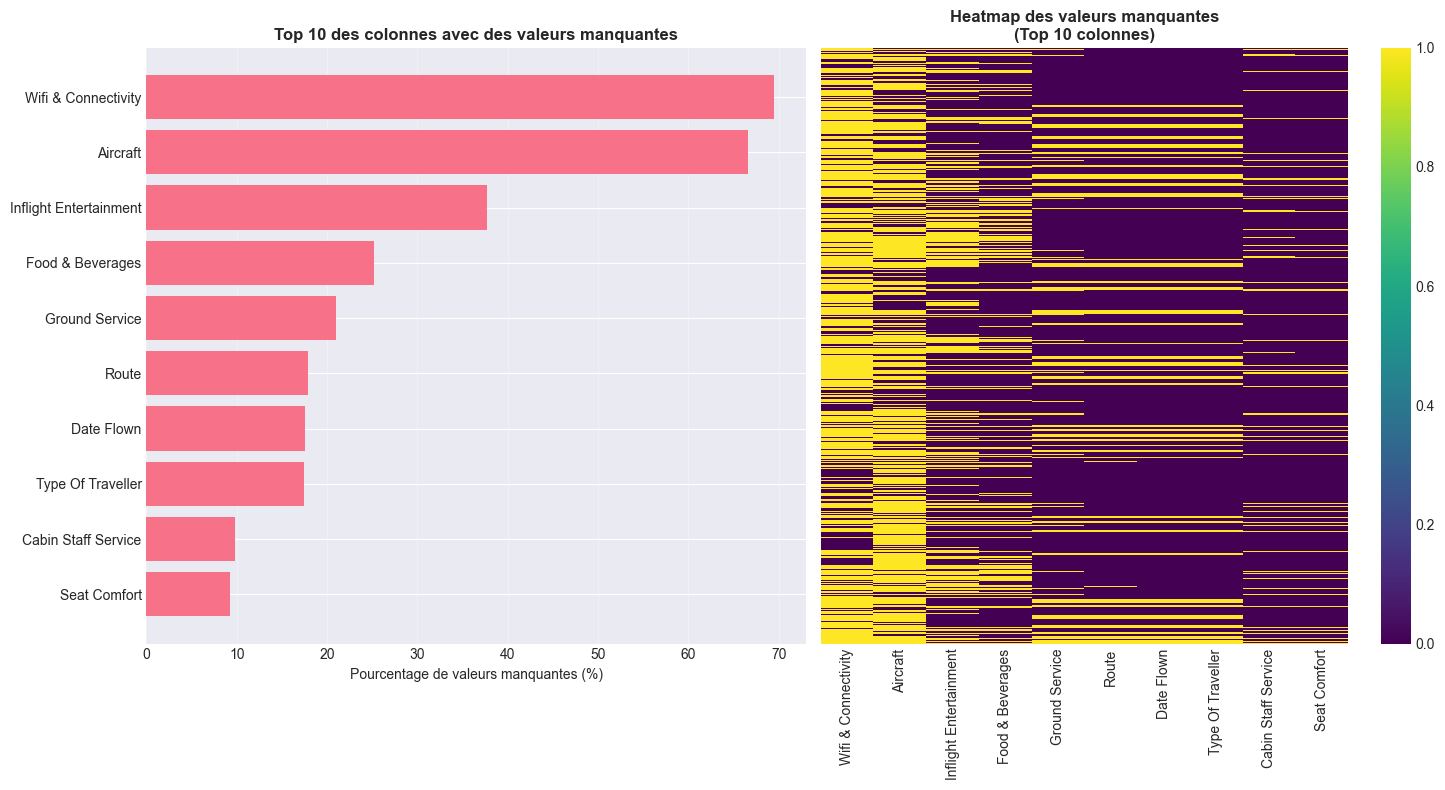

In [10]:
# A. GRAPHIQUE DES VALEURS MANQUANTES
print("\n✅ Analyse des valeurs manquantes")
print("="*50)

# Préparer les données des valeurs manquantes
missing_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
missing_cols = pd.DataFrame({
    'Colonnes': missing_pct.index,
    'Pourcentage': missing_pct.values
})

# Afficher le résumé
print("\nTop 10 des colonnes avec valeurs manquantes:")
print(missing_cols.head(10).to_string(index=False))

# Visualisation des données manquantes
plt.figure(figsize=(15, 8))

# Graphique 1: Top 10 des colonnes avec valeurs manquantes
plt.subplot(1, 2, 1)
missing_cols_top = missing_cols.head(10)
plt.barh(missing_cols_top['Colonnes'], missing_cols_top['Pourcentage'])#Barres horizontales : y,x
plt.xlabel('Pourcentage de valeurs manquantes (%)')
plt.title('Top 10 des colonnes avec des valeurs manquantes', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis() # Inverser l'axe y pour avoir la barre la plus grande en haut
plt.grid(axis='x', alpha=0.3)

# Graphique 2: Heatmap des valeurs manquantes (Top 10 colonnes)
plt.subplot(1, 2, 2)
sample_cols = missing_cols.head(10)['Colonnes'].tolist() #Sélection des 10 premières colonnes avec le plus de valeurs manquantes et les convertir en liste python
if sample_cols:
    sns.heatmap(df[sample_cols].isnull(), cbar=True, yticklabels=False, cmap='viridis')#df[sample_cols].isnull() : affiche true (manquant)/false (présent)
    plt.title('Heatmap des valeurs manquantes\n(Top 10 colonnes)', fontsize=12, fontweight='bold')
#0 present - 1 manquant
plt.tight_layout()
plt.show()


In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns


📊 ENCODAGE DE LA VARIABLE 'RECOMMENDED'

Valeurs dans 'Recommended' : ['no' 'yes' nan]
Type : object

Vérification de l'encodage:
Recommended  Recommended_encoded
         no                    0
         no                    0
         no                    0
        yes                    1
         no                    0
         no                    0
        yes                    1
         no                    0
        yes                    1
         no                    0

Corrélation avec Recommended (encodée):
Recommended_encoded       1.000000
rating                    0.905070
Value For Money           0.845696
Ground Service            0.782916
Cabin Staff Service       0.733575
Seat Comfort              0.717331
Food & Beverages          0.703683
Wifi & Connectivity       0.661207
Inflight Entertainment    0.564471
Name: Recommended_encoded, dtype: float64

--------------------------------------------------
Création du graphique Heatmap...


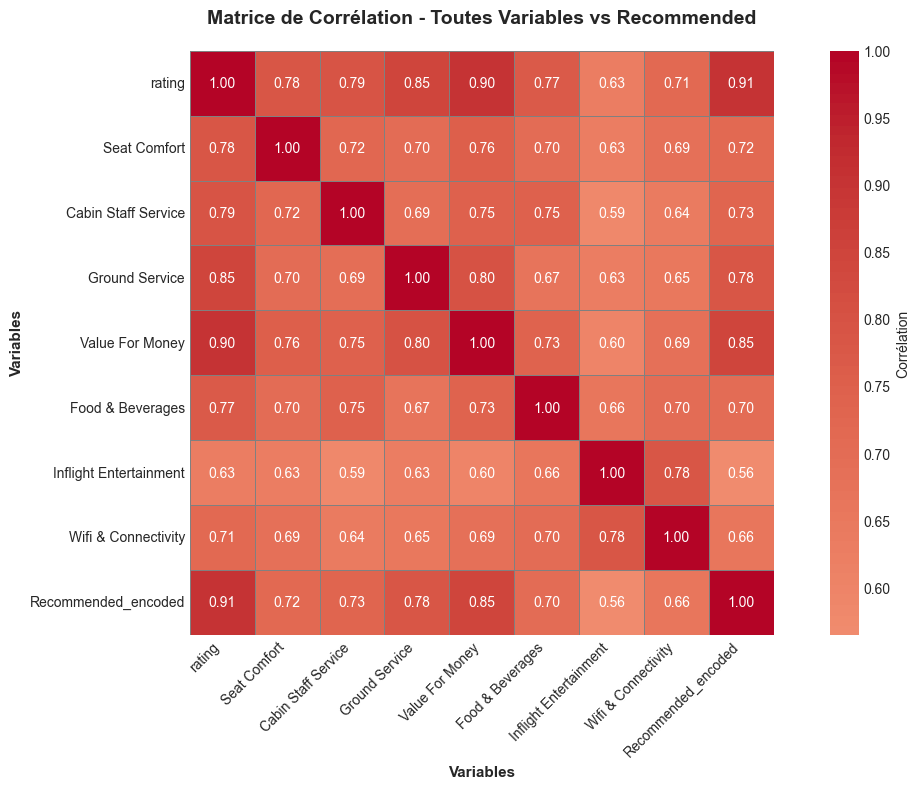

In [12]:
# E. ENCODAGE DE RECOMMENDED ET MATRICE DE CORRÉLATION
print("\n" + "="*50)
print("📊 ENCODAGE DE LA VARIABLE 'RECOMMENDED'")
print("="*50)

# Voir les valeurs uniques
print(f"\nValeurs dans 'Recommended' : {df['Recommended'].unique()}")
print(f"Type : {df['Recommended'].dtype}\n")

# Encoder temporairement (sans modifier le DataFrame)
recommended_encoded_temp = (df['Recommended'] == 'yes').astype(int)  # 1 si Yes, 0 sinon

# Vérifier
print("Vérification de l'encodage:")
print(pd.DataFrame({
    'Recommended': df['Recommended'].head(10),
    'Recommended_encoded': recommended_encoded_temp.head(10)
}).to_string(index=False))

# Créer un DataFrame temporaire pour la corrélation
temp_corr_data = pd.concat([df[numeric_cols], recommended_encoded_temp.rename('Recommended_encoded')], axis=1)
corr_matrix_with_target = temp_corr_data.corr()

print("\nCorrélation avec Recommended (encodée):")
corr_values = corr_matrix_with_target['Recommended_encoded'].squeeze() #.squeeze() pour convertir DataFrame 1 colonne en Series 1D
print(corr_values.sort_values(ascending=False))

# Créer la heatmap de corrélation
print("\n" + "-"*50)
print("Création du graphique Heatmap...")

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_with_target,
            annot=True,  # Afficher les valeurs de corrélation
            fmt='.2f',   # Format à 2 décimales
            cmap='coolwarm',  # Couleurs: bleu (négatif) -> rouge (positif)
            center=0,    # Centrer la couleur à 0
            square=True, # Carré pour chaque cellule
            cbar_kws={'label': 'Corrélation'},
            linewidths=0.5,
            linecolor='gray')

plt.title('Matrice de Corrélation - Toutes Variables vs Recommended',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=11, fontweight='bold')
plt.ylabel('Variables', fontsize=11, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
# Valeurs dupliquées
print("\n2. 🔄 DOUBLONS")
print("-" * 30)
duplicates_exact = df.duplicated().sum()
print(f"\nB. Lignes dupliquées : {duplicates_exact} ({duplicates_exact/len(df)*100:.2f}%)")
if duplicates_exact > 0:
    print(f"   • Exemples :")
    dup_rows = df[df.duplicated(keep=False)]
    print(dup_rows.head().to_string())


2. 🔄 DOUBLONS
------------------------------

B. Lignes dupliquées : 153 (0.31%)
   • Exemples :
     airline  rating                  header                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

# PHASE 4 : ANALYSE UNIVARIÉE

In [15]:
# B. Ratings hors plage
rating_patterns = ['rating', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value For Money', 'Food & Beverages', 'Inflight Entertainment', 'Wifi & Connectivity']
for col in rating_patterns:
    if df[col].dtype in ['int64', 'float64']:
        if df[col].min() < 0 or df[col].max() > 10:
            print(f"Rating '{col}' hors plage [0,10]")
        else:
            print(f"Rating '{col}' OK")

Rating 'rating' OK
Rating 'Seat Comfort' OK
Rating 'Cabin Staff Service' OK
Rating 'Ground Service' OK
Rating 'Value For Money' OK
Rating 'Food & Beverages' OK
Rating 'Inflight Entertainment' OK
Rating 'Wifi & Connectivity' OK



📦 Boxplots pour détection des outliers :


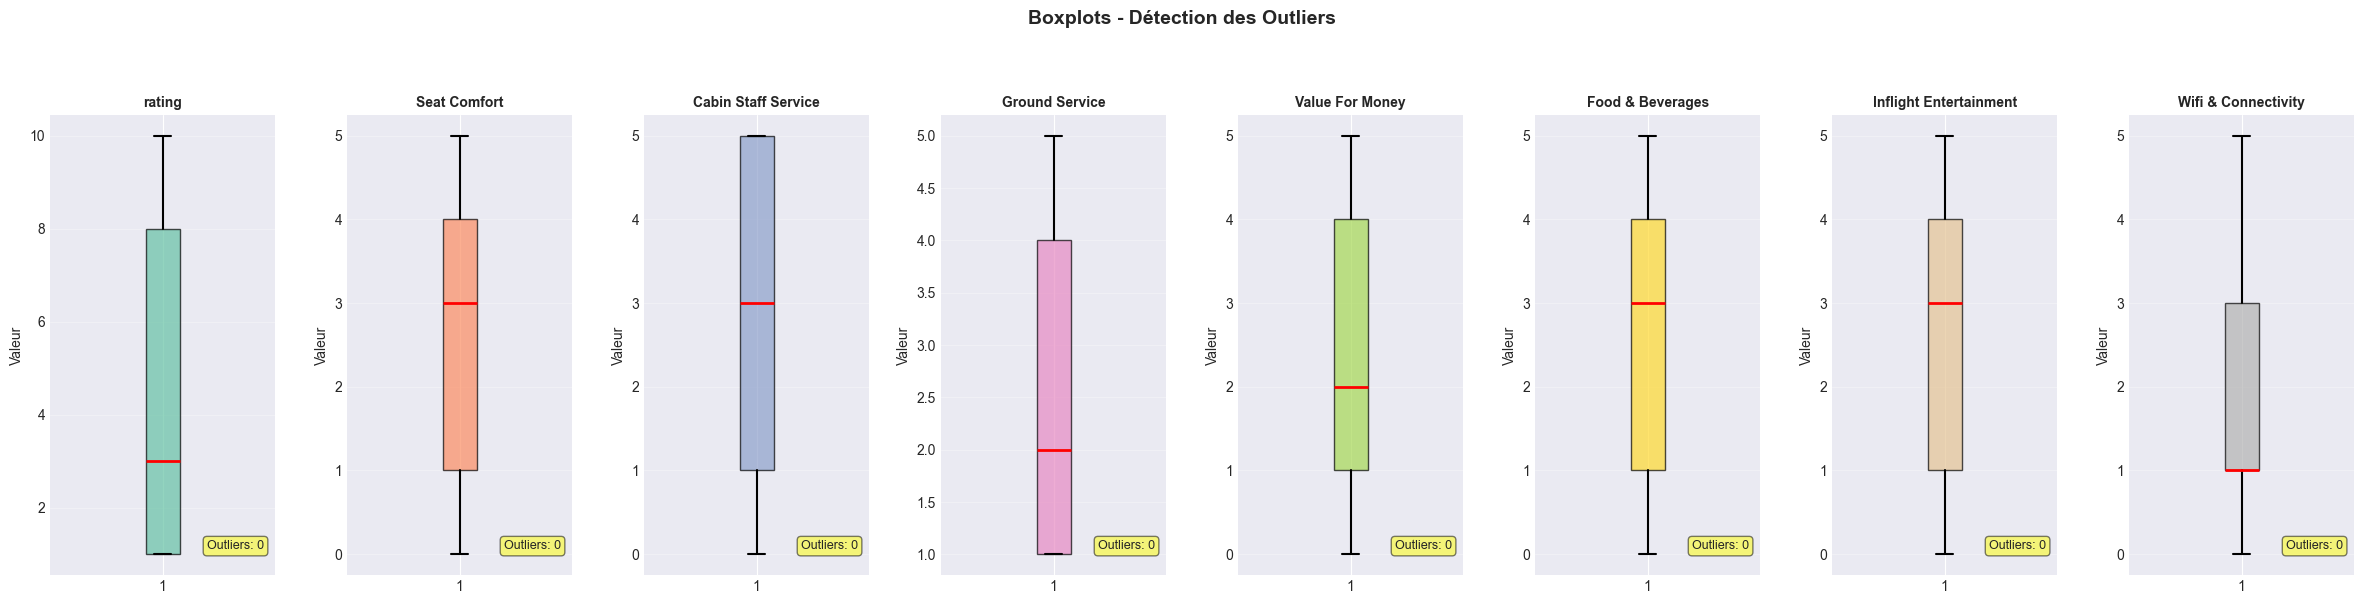

In [16]:
# 4. BOXPLOTS POUR DÉTECTION DES OUTLIERS
print("\n📦 Boxplots pour détection des outliers :")
fig2, axes2 = plt.subplots(1, len(numeric_cols),
                          figsize=(max(15, len(numeric_cols)*3), 6))

if len(numeric_cols) == 1:
    axes2 = [axes2]

# Couleurs pour les boxplots
box_colors = plt.cm.Set2(np.linspace(0, 1, len(numeric_cols)))

for idx, col in enumerate(numeric_cols):
    ax = axes2[idx]

    # Boxplot avec points outliers
    bp = ax.boxplot(df[col].dropna(), patch_artist=True,
                  boxprops=dict(facecolor=box_colors[idx], alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='black', linewidth=1.5),
                  capprops=dict(color='black', linewidth=1.5),
                  flierprops=dict(marker='o', markerfacecolor='red',
                                  markersize=4, alpha=0.6))

    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_ylabel('Valeur')
    ax.grid(True, alpha=0.3, axis='y')

    # Compter les outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]

    # Afficher le nombre d'outliers
    ax.text(0.95, 0.05, f"Outliers: {len(outliers)}",
            transform=ax.transAxes, fontsize=9,
            verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.suptitle('Boxplots - Détection des Outliers',
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout(pad=2.0)
plt.show()


In [17]:
# ============================================
# 5. ANALYSE STATISTIQUE
# ============================================
print("\n📈 ANALYSE STATISTIQUE")
print("-" * 30)
print("A. Statistiques descriptives (variables numériques) :")

#df.select_dtypes: Return a subset of the DataFrame's columns based on the column dtypes.
#.columns retourne juste les colonnes ayant des valeurs de type (include=[np.number])
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe().round(2).to_string()) #.to_string eviter de tronquer les données (retour à la ligne)
else:
    print("Aucune colonne numérique détectée")

print("\nB. Statistiques descriptives (variables catégorielles) :")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
#category : Variables avec valeurs limitées -- comme enumération en java
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n   {col}:")
        print(f"   - Valeurs uniques : {df[col].nunique()}") #compte le nombre de valeurs DISTINCTES
        if df[col].nunique() <= 10:
            print(f"   - Distribution :")
            print(df[col].value_counts(dropna=False).to_string())
else:
    print("   Aucune colonne catégorielle détectée")


📈 ANALYSE STATISTIQUE
------------------------------
A. Statistiques descriptives (variables numériques) :
         rating  Seat Comfort  Cabin Staff Service  Ground Service  Value For Money  Food & Beverages  Inflight Entertainment  Wifi & Connectivity
count  49180.00      45501.00             45256.00        39646.00         49930.00          37528.00                31222.00             15287.00
mean       4.39          2.80                 3.03            2.43             2.59              2.75                    2.63                 2.11
std        3.50          1.47                 1.61            1.61             1.60              1.53                    1.55                 1.49
min        1.00          0.00                 0.00            1.00             0.00              0.00                    0.00                 0.00
25%        1.00          1.00                 1.00            1.00             1.00              1.00                    1.00                 1.00
50%       

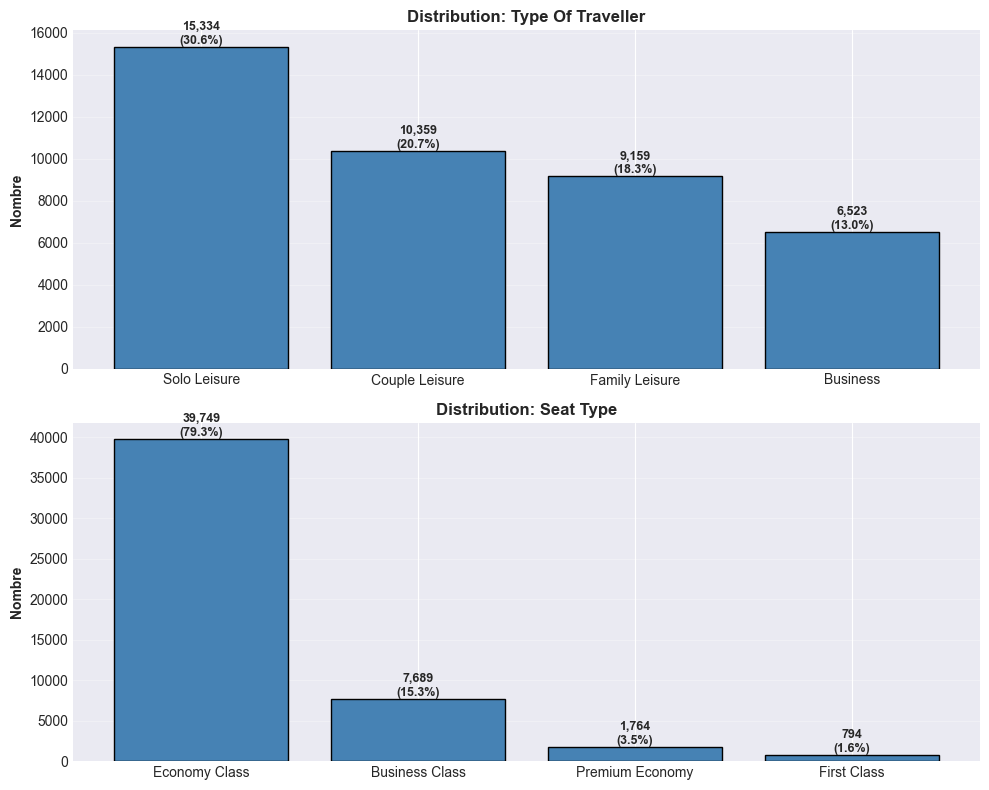

In [18]:
# DISTRIBUTION DES CLASSES - VARIABLES CATÉGORIELLES
if len(categorical_cols) > 0:
    cat_cols_filtered = [col for col in categorical_cols if col != 'Recommended' and df[col].nunique() <= 10]

    if cat_cols_filtered:
        n_plots = len(cat_cols_filtered)
        fig = plt.figure(figsize=(10, 4*n_plots)) #4pouces pour chaque graphique

        plot_num = 1
        for col in cat_cols_filtered:
            ax = plt.subplot(n_plots, 1, plot_num)
            dist = df[col].value_counts()
            bars = ax.bar(dist.index, dist.values, color='steelblue', edgecolor='black')
            ax.set_ylabel('Nombre', fontweight='bold')
            ax.set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
            ax.grid(axis='y', alpha=0.3)

            # Ajouter les valeurs
            for bar in bars:
                height = bar.get_height()
                pct = height/len(df)*100
                x_pos = bar.get_x() + bar.get_width()/2 #Centre du bar : bar.get_x() retourne la position x du bord gauche du bar
                label = f'{int(height):,}\n({pct:.1f}%)'
                ax.text(x_pos, height, label, ha='center', va='bottom', fontweight='bold', fontsize=9)

            plot_num += 1

        plt.tight_layout()
        plt.show()

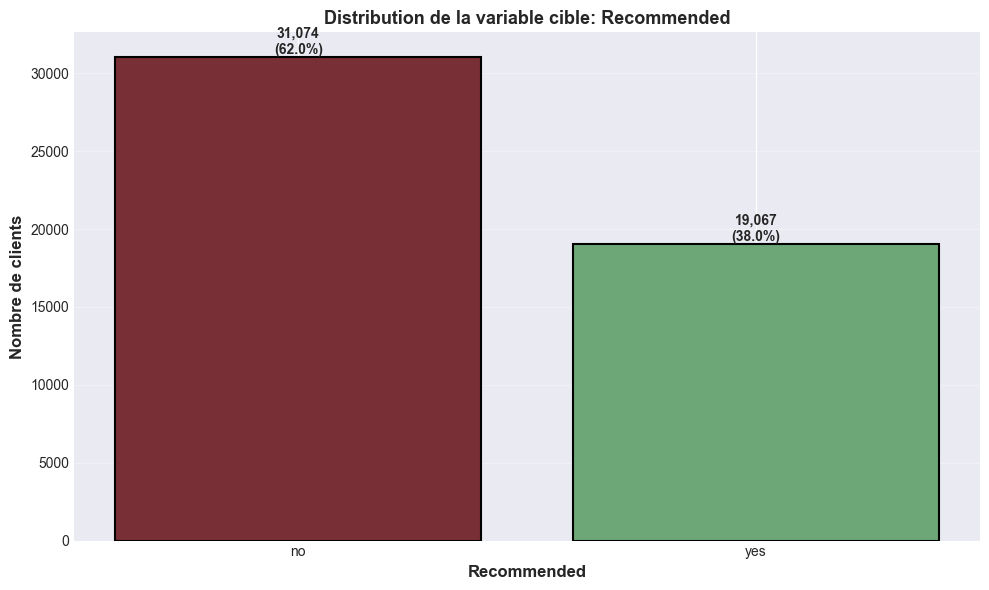

In [19]:
#DISTRIBUTION DE LA VARIABLE CIBLE (TARGET)
if 'Recommended' in df.columns:
    target_counts = df['Recommended'].value_counts()

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ["#782f35", "#6da777"]
    bars = ax.bar(target_counts.index, target_counts.values, color=colors, edgecolor='black', linewidth=1.5)
    ax.set_ylabel('Nombre de clients', fontsize=12, fontweight='bold')
    ax.set_xlabel('Recommended', fontsize=12, fontweight='bold')
    ax.set_title('Distribution de la variable cible: Recommended', fontsize=13, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

    # Labels avec count et pourcentage
    for bar in bars:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width()/2
        pct = height/len(df)*100
        ax.text(x, height, f'{int(height):,}\n({pct:.1f}%)',
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()


📊 DISTRIBUTIONS DES VARIABLES NUMÉRIQUES
Analyse de 8 variables numériques...

📈 Statistiques descriptives :
                          count  mean   std  min  median   max  skewness  kurtosis  missing_%
rating                  49180.0  4.39  3.50  1.0     3.0  10.0      0.45     -1.47       1.92
Seat Comfort            45501.0  2.80  1.47  0.0     3.0   5.0      0.10     -1.37       9.26
Cabin Staff Service     45256.0  3.03  1.61  0.0     3.0   5.0     -0.06     -1.57       9.74
Ground Service          39646.0  2.43  1.61  1.0     2.0   5.0      0.52     -1.39      20.93
Value For Money         49930.0  2.59  1.60  0.0     2.0   5.0      0.35     -1.49       0.42
Food & Beverages        37528.0  2.75  1.53  0.0     3.0   5.0      0.14     -1.41      25.16
Inflight Entertainment  31222.0  2.63  1.55  0.0     3.0   5.0      0.15     -1.34      37.73
Wifi & Connectivity     15287.0  2.11  1.49  0.0     1.0   5.0      0.92     -0.72      69.51


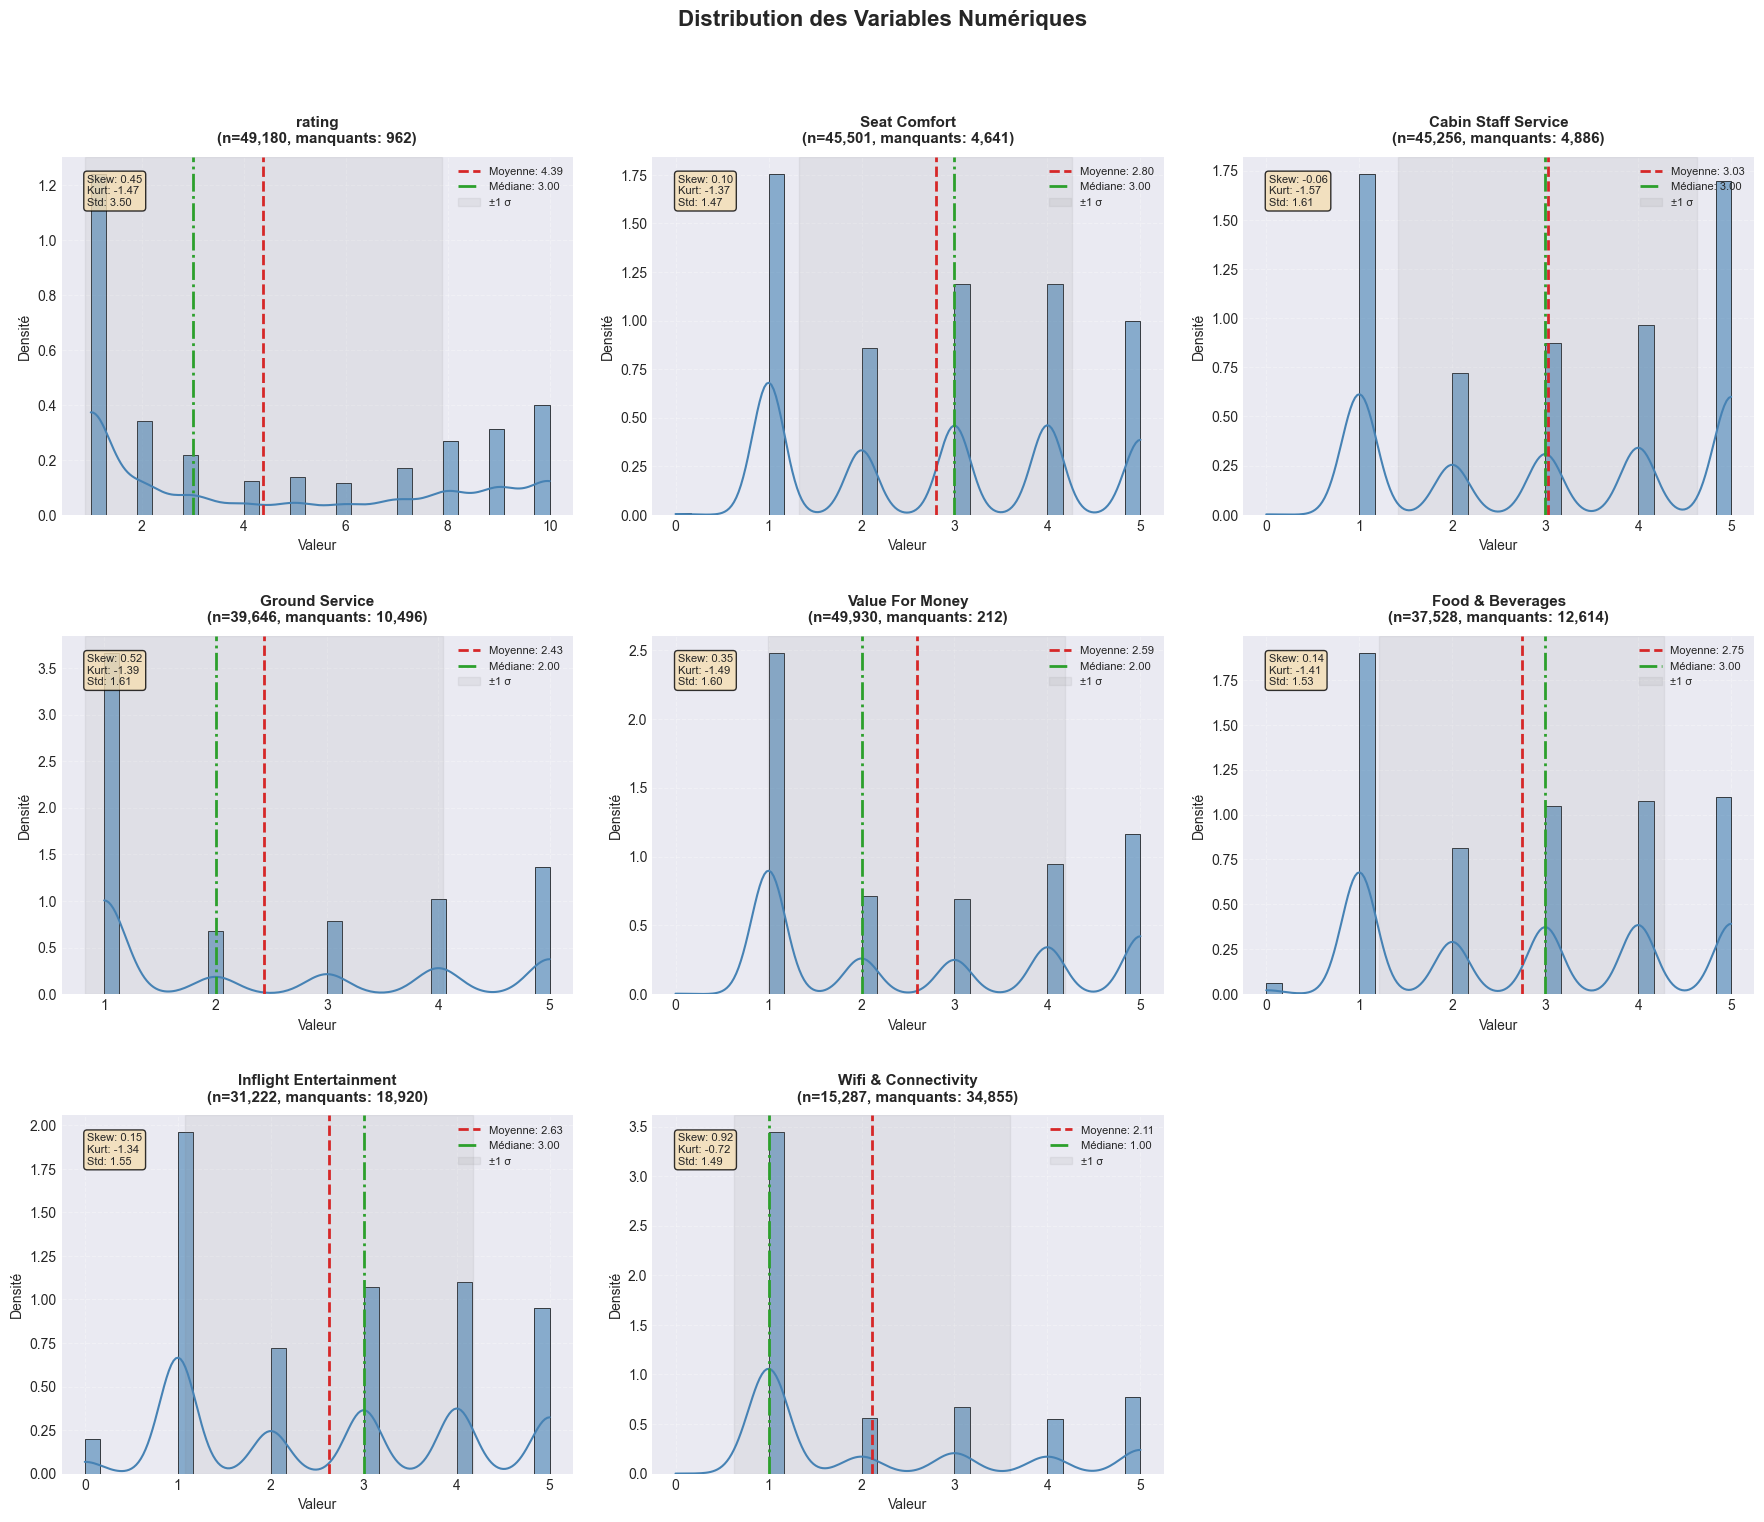

In [20]:
# B. DISTRIBUTION DES VARIABLES NUMÉRIQUES
print("\n📊 DISTRIBUTIONS DES VARIABLES NUMÉRIQUES")
print("=" * 60)

if len(numeric_cols) > 0:
    print(f"Analyse de {len(numeric_cols)} variables numériques...")

    # 1. AFFICHER LES STATISTIQUES DESCRIPTIVES
    print("\n📈 Statistiques descriptives :")
    stats_df = df[numeric_cols].describe().T
    stats_df['skewness'] = df[numeric_cols].skew()
    stats_df['kurtosis'] = df[numeric_cols].kurtosis()
    stats_df['missing_%'] = (df[numeric_cols].isna().sum() / len(df) * 100)

    # Formater l'affichage
    print(stats_df[['count', 'mean', 'std', 'min', '50%', 'max',
                    'skewness', 'kurtosis', 'missing_%']]
          .rename(columns={'50%': 'median'})
          .round(2)
          .to_string())

    # 2. VISUALISATION AMÉLIORÉE
    # Déterminer la disposition des graphiques
    n_cols = 3  # 3 colonnes au lieu de 2 pour mieux utiliser l'espace
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Arrondi supérieur

    # Créer la figure avec plus d'espace
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

    # Si une seule ligne, axes n'est pas un tableau 2D

    if n_rows == 1:
        axes = axes.reshape(1, -1)

    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols):
        ax = axes[idx]
        data = df[col].dropna()

        # Créer un subplot avec 2 graphiques superposés
        # Histogramme + KDE
        hist_color = 'steelblue'
        mean_color = '#d62728'  # rouge
        median_color = '#2ca02c'  # vert

        # Histogramme avec KDE
        sns.histplot(data, bins=30, ax=ax, color=hist_color,
                     alpha=0.6, kde=True, stat='density',
                     edgecolor='black', linewidth=0.5)

        # Ajouter lignes verticales pour mean/median
        ax.axvline(data.mean(), color=mean_color, linestyle='--',
                   linewidth=2, label=f'Moyenne: {data.mean():.2f}')
        ax.axvline(data.median(), color=median_color, linestyle='-.',
                   linewidth=2, label=f'Médiane: {data.median():.2f}')

        # Mettre en évidence la zone ±1 écart-type
        std = data.std()
        ax.axvspan(data.mean() - std, data.mean() + std,
                   alpha=0.1, color='gray', label='±1 σ')

        # Titre et labels
        ax.set_title(f'{col}\n(n={len(data):,}, manquants: {df[col].isna().sum():,})',
                     fontsize=11, fontweight='bold', pad=10)
        ax.set_xlabel('Valeur')
        ax.set_ylabel('Densité')

        # Légende
        ax.legend(loc='upper right', fontsize=8, framealpha=0.9)

        # Améliorer la grille
        ax.grid(True, alpha=0.3, linestyle='--')

        # Statistiques en texte dans le coin
        skew_val = data.skew()
        kurt_val = data.kurtosis()

        stats_text = (f"Skew: {skew_val:.2f}\n"
                      f"Kurt: {kurt_val:.2f}\n"
                      f"Std: {std:.2f}")

        text_x = 0.05
        text_ha = 'left'

        ax.text(text_x, 0.95, stats_text, transform=ax.transAxes,
                fontsize=8, verticalalignment='top',
                horizontalalignment=text_ha,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Masquer les axes vides
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].axis('off')
        axes[idx].set_visible(False)  # Masquer complètement

    # 3. AJUSTEMENT OPTIMAL DES ESPACES
    plt.suptitle('Distribution des Variables Numériques',
                 fontsize=16, fontweight='bold', y=1.02)

    # Ajustement précis
    plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=2.0)
    # pad: marge générale
    # h_pad: espace vertical entre lignes de subplots
    # w_pad: espace horizontal entre colonnes

    # Alternative avec subplots_adjust pour plus de contrôle
    # plt.subplots_adjust(left=0.05, right=0.98, bottom=0.05, top=0.95,
    #                     wspace=0.25, hspace=0.4)

    plt.show()


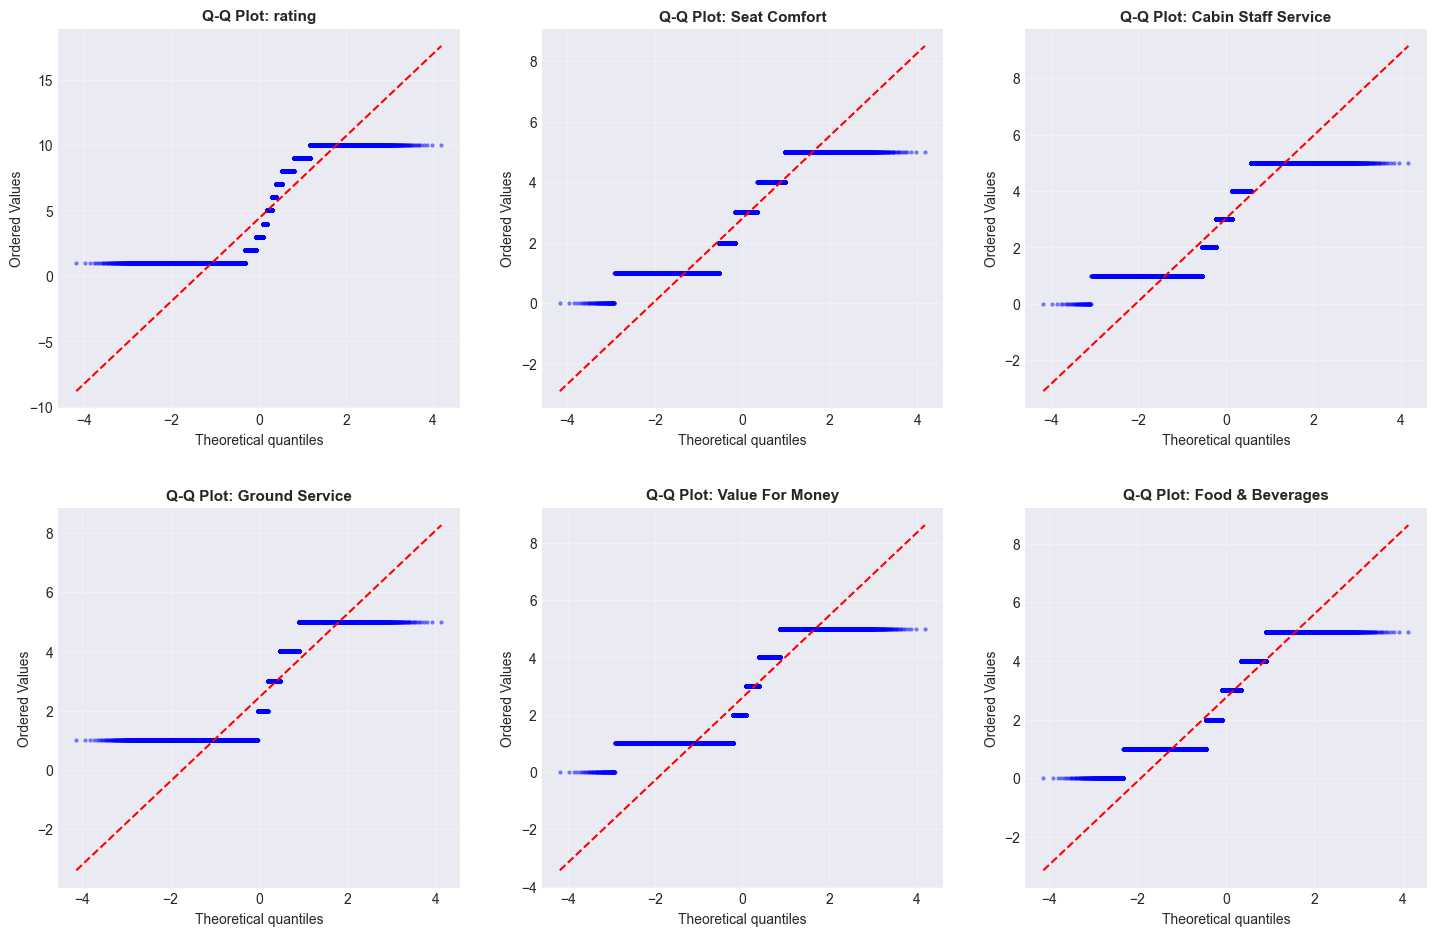

In [21]:
import seaborn as sns
from scipy import stats
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:6]):
    ax = axes[idx]

    # Q-Q plot avec seaborn (plus esthétique)
    stats.probplot(df[col].dropna(), dist="norm", plot=ax)

    # Récupérer les éléments du graphique pour les modifier
    lines = ax.get_lines()

    # Modifier les points (premier élément)
    points = lines[0]
    points.set_markersize(3)  # Taille des points
    points.set_alpha(0.5)     # Transparence
    points.set_markerfacecolor('blue')
    points.set_markeredgecolor('none')

    # Modifier la ligne (deuxième élément)
    line = lines[1]
    line.set_color('red')
    line.set_linewidth(1.5)
    line.set_linestyle('--')

    ax.set_title(f'Q-Q Plot: {col}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Ajustement
for idx in range(len(numeric_cols[:6]), len(axes)):
    axes[idx].axis('off')

plt.tight_layout(pad=3.0)
plt.show()

# PHASE 4 : ANALYSE MULTIVARIÉE


📈 RELATION FEATURES vs TARGET


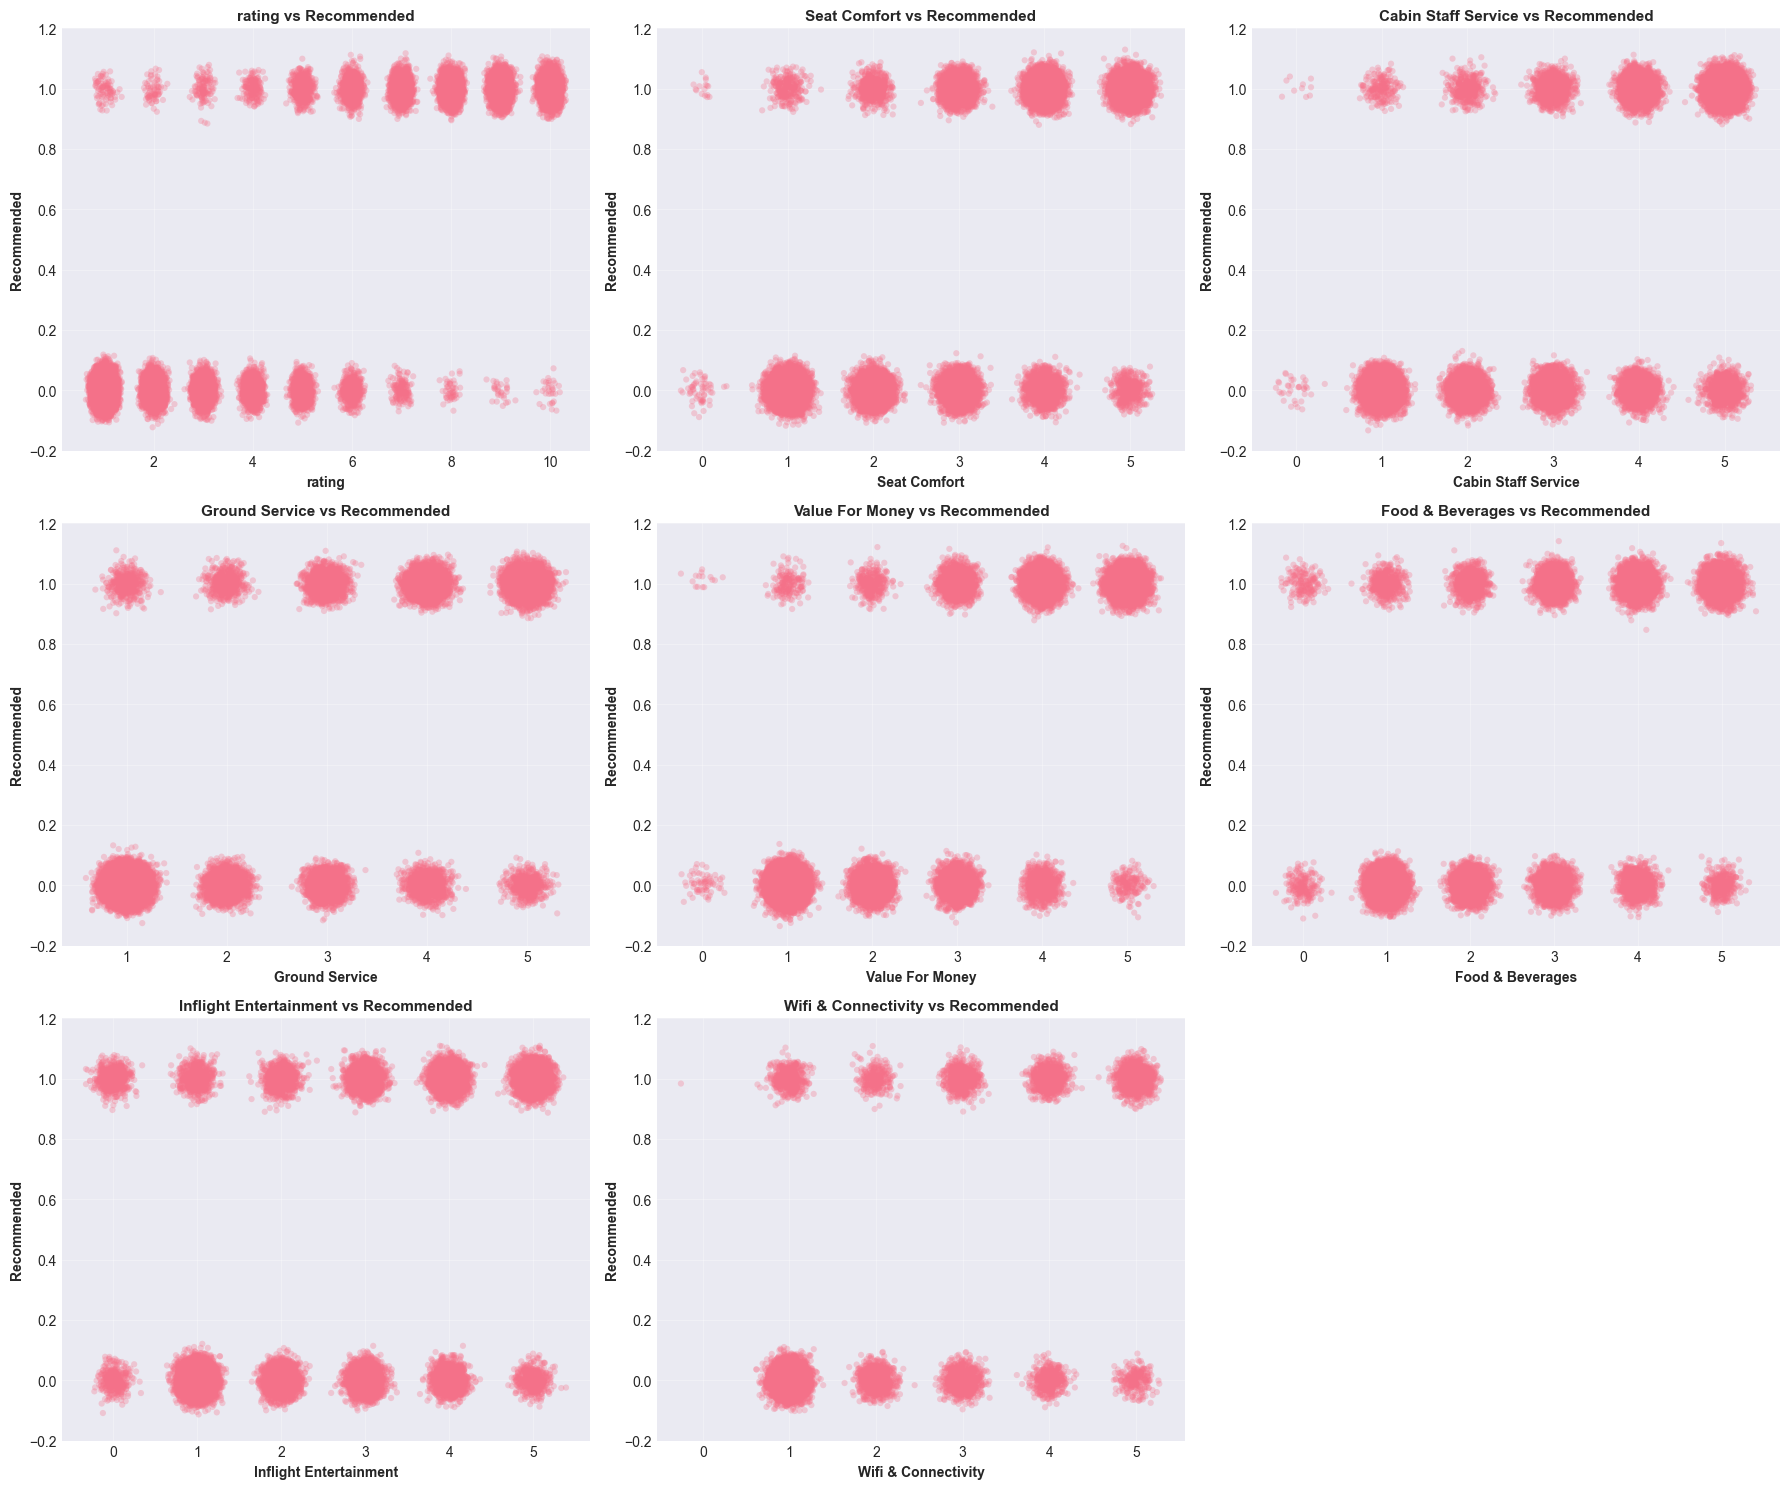


📊 RELATION CATÉGORIES vs RECOMMENDED


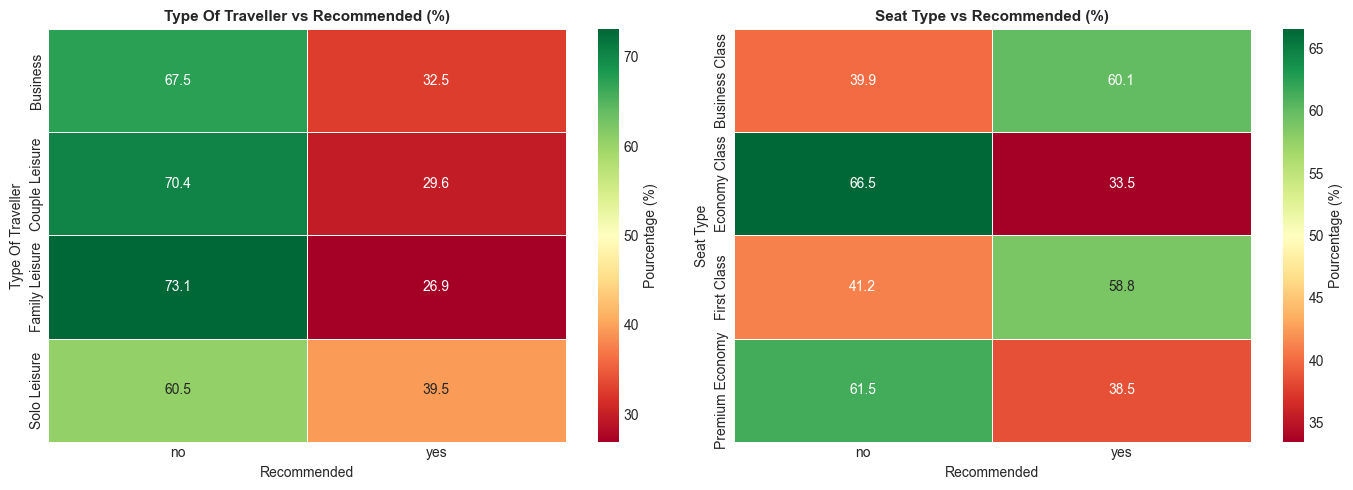

In [22]:
# F. DIAGRAMMES SCATTER POUR RELATION FEATURES-TARGET
if 'Recommended' in df.columns and len(numeric_cols) > 0:
    print("\n" + "="*50)
    print("📈 RELATION FEATURES vs TARGET")
    print("="*50)

    # Déterminer le nombre de graphiques et la disposition
    n_plots = len(numeric_cols)
    n_cols = 3  # 3 colonnes par ligne
    n_rows = (n_plots + 2) // 3  # Calcul automatique des lignes

    # Créer les sous-graphiques avec la disposition dynamique
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    # Créer un scatter plot pour chaque feature
    for idx in range(n_plots):
        col = numeric_cols[idx]

        # Scatter plot avec jitter pour voir la densité
        jitter_x = df[col] + np.random.normal(0, 0.1, len(df))  # Ajouter du bruit
        jitter_y = recommended_encoded_temp + np.random.normal(0, 0.03, len(recommended_encoded_temp))
        #jitter:Au lieu que 1000 points au rating=5 se superposent exactement,
        #ils vont être légèrement décalés horizontalement : 5.05, 4.99, 5.02, etc.
        # Ça crée un "cloud" visible de points qui montre visuellement la densité réelle.
        axes[idx].scatter(jitter_x, jitter_y, alpha=0.3, s=20, edgecolors='none')
        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Recommended', fontsize=10, fontweight='bold')
        axes[idx].set_title(col + ' vs Recommended', fontsize=11, fontweight='bold')
        axes[idx].set_ylim(-0.2, 1.2)
        axes[idx].grid(alpha=0.3)

    # Masquer les axes vides
    for idx in range(n_plots, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()



# G. HEATMAPS POUR LES VARIABLES CATÉGORIELLES vs RECOMMENDED
print("\n" + "="*50)
print("📊 RELATION CATÉGORIES vs RECOMMENDED")
print("="*50)

if len(categorical_cols) > 0:
    # Filtrer les colonnes catégorielles avec peu de valeurs uniques
    cat_cols_filtered = []
    for col in categorical_cols:
        if col != 'Recommended' and df[col].nunique() <= 10:
            cat_cols_filtered.append(col)

    if cat_cols_filtered:
        n_plots = len(cat_cols_filtered)
        n_cols_layout = 2  # 2 colonnes par ligne
        n_rows_layout = (n_plots + 1) // 2  # Calcul automatique des lignes

        fig, axes = plt.subplots(n_rows_layout, n_cols_layout, figsize=(14, 5*n_rows_layout))
        axes = axes.flatten()

        # Créer une heatmap pour chaque colonne catégorielles
        for idx, col in enumerate(cat_cols_filtered):
            # Créer une crosstab(tableau croisé) entre la catégorie et Recommended
            crosstab = pd.crosstab(df[col], df['Recommended'], margins=False) #Lignes = Les catégories uniques de la colonne (Air France, Lufthansa, etc.)
                                                                                # Colonnes = Les valeurs de Recommended (no, yes)
                                                                                # Valeurs = Nombre de clients dans chaque combinaison
                                                                                # margins=False = Ne pas ajouter les totaux (TRUE/FALSE)

            # Calculer les pourcentages par ligne
            crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100  #div=operation de division / ... crosstab_pct = crosstab / crosstab.sum(axis=1) #pourcentage de no et yes pour chaque catégorie

            # Créer la heatmap
            sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[idx],
                        cbar_kws={'label': 'Pourcentage (%)'}, linewidths=0.5)
            axes[idx].set_title(f'{col} vs Recommended (%)', fontsize=11, fontweight='bold')
            axes[idx].set_xlabel('Recommended', fontsize=10)
            axes[idx].set_ylabel(col, fontsize=10)

        # Masquer les axes vides
        for idx in range(len(cat_cols_filtered), len(axes)):
            axes[idx].axis('off')

        plt.tight_layout()
        plt.show()

**Analyse Mémoire et Consommation**

In [24]:
print(df.memory_usage(deep=True)) #= taille des pointeurs + taille des objets pointés

Index                          132
airline                    3122229
rating                      401136
header                     4069056
review                    95997651
Aircraft                   2055376
Type Of Traveller          2817363
Seat Type                  3114053
Route                      3230439
Date Flown                 2766025
Seat Comfort                401136
Cabin Staff Service         401136
Ground Service              401136
Value For Money             401136
Recommended                2576290
Food & Beverages            401136
Inflight Entertainment      401136
Wifi & Connectivity         401136
dtype: int64


In [25]:
# ============================================
# OPTIMISATION : COLONNES RATINGS
# ============================================
def optimize_all_ratings(df):
    """Optimise TOUTES les colonnes de ratings 0.0-10.0"""

    # 1. Identifier les colonnes de ratings
    rating_cols = ['rating', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value For Money', 'Food & Beverages', 'Inflight Entertainment', 'Wifi & Connectivity']

    for col in df.columns:
      # Par valeurs (0-10 float) - verification s'il y a encore des colonnes de ratings
      if df[col].dtype in ['float64', 'float32'] and col not in rating_cols:
        if df[col].min() >= 0 and df[col].max() <= 10:
          rating_cols.append(col)

    # 2. Optimiser
    for col in rating_cols:
        # Vérifier si déjà optimisé
        if df[col].dtype in ['int8', 'uint8', 'int16', 'uint16']:
            continue
        # Convertir float en int avec Int8 (3.0 → 3, économie mémoire = 8 bits!)
        df[col] = df[col].round().astype('Int8')
        # Vérifier qu'aucune valeur ne dépasse 10
        if df[col].max() > 10:
            print(f"⚠️  {col}: valeur > 10 détectée")
            df[col] = df[col].clip(0, 10)

    print(f"✅ {len(rating_cols)} colonnes de ratings optimisées")
    return df

In [26]:
# Avant optimisation
print("Mémoire avant optimisation :")
print(df.memory_usage(deep=True).sum(), "octets")
# Appel fonction optimisation
df_copy = df.copy()
df_optimized = optimize_all_ratings(df_copy)
# Aprés optimisation
print("\nMémoire après optimisation :")
print(df_optimized.memory_usage(deep=True).sum(), "octets")
print(f"Économie : {100*(1 - df_optimized.memory_usage().sum()/df.memory_usage().sum()):.1f}%")

Mémoire avant optimisation :
122957702 octets
✅ 8 colonnes de ratings optimisées

Mémoire après optimisation :
120550886 octets
Économie : 35.3%


In [27]:
df_optimized.head()

,airline,rating,header,review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,British Airways,3,“Never again”,✅ Trip Verified | I had sworn never again w...,Boeing 777,Solo Leisure,Business Class,San Francisco to London,October 2025,3,2,1,2,no,<NA>,<NA>,<NA>
1,British Airways,1,“not able to check-in online”,✅ Trip Verified | Flying business and not a...,A320,Business,Business Class,Basel to London,November 2025,3,5,<NA>,1,no,5,<NA>,<NA>
2,British Airways,3,"""a very budget airline these days""",Not Verified | Flew to and from St Lucia with...,Boeing 777,Couple Leisure,Economy Class,St Lucia to London Gatwick,November 2025,1,1,3,3,no,1,3,<NA>
3,British Airways,7,"""a nice experience""",✅ Trip Verified | This was a surprisingly OK...,NaN,Solo Leisure,Economy Class,London to New Orleans,November 2025,4,5,3,3,yes,4,4,<NA>
4,British Airways,1,"""it appears bullying is ok""",✅ Trip Verified | We were taking my 90 year ...,NaN,Couple Leisure,Economy Class,Gatwick to Tenerife South,November 2025,1,1,1,1,no,<NA>,<NA>,<NA>


In [28]:
# ============================================
# 8. RÉSUMÉ SYNTHÉTIQUE
# ============================================
print("\n" + "=" * 50)
print("📋 RÉSUMÉ SYNTHÉTIQUE DU DATASET")
print("=" * 50)

summary = {
    'Lignes': df.shape[0],
    'Colonnes': df.shape[1],
    'Colonnes numériques': len(numeric_cols),
    'Colonnes catégorielles': len(categorical_cols),
    'Valeurs totales': df.size,
    'Mémoire utilisée': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f} MB",
    'Lignes dupliquées': duplicates_exact,
    'Colonnes avec valeurs manquantes': len(missing_df),
    'Taux de complétude global': f"{(1 - df.isna().sum().sum() / df.size) * 100:.1f}%"
}
#df.isna().sum() somme/ colonne
#df.isna().sum().sum() somme par colonne /ligne
for key, value in summary.items():
    print(f"• {key}: {value}")

print("\n" + "=" * 50)


📋 RÉSUMÉ SYNTHÉTIQUE DU DATASET
• Lignes: 50142
• Colonnes: 17
• Colonnes numériques: 8
• Colonnes catégorielles: 9
• Valeurs totales: 852414
• Mémoire utilisée: 117.26 MB
• Lignes dupliquées: 153
• Colonnes avec valeurs manquantes: 15
• Taux de complétude global: 82.7%



# PHASE 5 : NETTOYAGE DES DONNEES

In [29]:
#depuis ce moment on travaille avec df_optimized
df_clean=df_optimized.copy()

# Traitement sur les valeurs manquantes

**Aircraft**

In [30]:
# les colonnes qui ont > 50% NAN => à supprimer
# les colonnes qui ont entre 30% et 50% NAN => on vérifie sa corrélation avec Target

#Aircraft : 66.58% nulles => à supprimer
#Wifi & Connectivity : 69.51% nulles => à supprimer
#Inflight Entertainent : 37.73% nulles => à décider => voir sa correlation avec recommended => 0.56 => correlation forte => colonne à conserver

# Supprimer les colonnes qui ont une pourcentages importantes de NAN
columns_to_drop = [
    'Aircraft',
    'Wifi & Connectivity'
]

print("\n" + "="*70)
print("🗑️ SUPPRESSION DES COLONNES")
print("="*70)

for col in columns_to_drop:
    if col in df_clean.columns:
        print(f"✓ Suppression de: {col}")
    else:
        print(f"⚠️ {col} n'existe pas dans df_clean")

# Supprimer les colonnes
df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')

print("\n" + "="*70)
print("✅ SUPPRESSION TERMINÉE")
print("="*70)
print(f"\nNombre de colonnes restantes: {len(df_clean.columns)}")
print(f"\nColonnes restantes:\n{list(df_clean.columns)}")
print(f"\nForme du dataframe: {df_clean.shape}")


🗑️ SUPPRESSION DES COLONNES
✓ Suppression de: Aircraft
✓ Suppression de: Wifi & Connectivity

✅ SUPPRESSION TERMINÉE

Nombre de colonnes restantes: 15

Colonnes restantes:
['airline', 'rating', 'header', 'review', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value For Money', 'Recommended', 'Food & Beverages', 'Inflight Entertainment']

Forme du dataframe: (50142, 15)


In [31]:
#imputer le reste des colonnes
#si variables numeriques alors on doit vérifier la distribution (skew) : si symetrique =>imputation par moyenne , sinon mediane

**rating , Seat Comfort , Cabin Staff Service , Ground Service , Value For Money , Food & Beverages , Inflight Entertainment**

In [32]:
columns_to_impute = [
    'rating',
    'Seat Comfort',
    'Cabin Staff Service',
    'Ground Service',
    'Value For Money',
    'Food & Beverages',
    'Inflight Entertainment'
]

# Calculer la skewness pour les colonnes à imputer
skewness_values = df_clean[columns_to_impute].skew()

# Seuil pour déterminer la symétrie
SKEW_THRESHOLD = 0.5

# Imputation basée sur la skewness calculée
print("\n" + "="*70)
print("🔧 IMPUTATION DES VALEURS MANQUANTES BASÉE SUR LA SKEWNESS")
print("="*70)

for col in columns_to_impute:
    if col in df_clean.columns:
        skewness = skewness_values[col]
        missing_count = df_clean[col].isna().sum()

        if missing_count > 0:
            if abs(skewness) < SKEW_THRESHOLD:
                imputation_value = df_clean[col].mean()
                method = "MOYENNE"
            else:
                imputation_value = df_clean[col].median()
                method = "MÉDIANE"

            # Round the imputation value to an integer before filling
            imputation_value = int(round(imputation_value))

            df_clean[col].fillna(imputation_value, inplace=True)

            print(f"✓ {col:25} | Skew: {skewness:7.3f} ({method:8}) | "
                  f"Valeur: {imputation_value:7.2f} | Valeurs imputées: {missing_count}")
        else:
            print(f"✓ {col:25} | Skew: {skewness:7.3f} | Aucune valeur manquante")


🔧 IMPUTATION DES VALEURS MANQUANTES BASÉE SUR LA SKEWNESS
✓ rating                    | Skew:   0.447 (MOYENNE ) | Valeur:    4.00 | Valeurs imputées: 962
✓ Seat Comfort              | Skew:   0.100 (MOYENNE ) | Valeur:    3.00 | Valeurs imputées: 4641
✓ Cabin Staff Service       | Skew:  -0.056 (MOYENNE ) | Valeur:    3.00 | Valeurs imputées: 4886
✓ Ground Service            | Skew:   0.523 (MÉDIANE ) | Valeur:    2.00 | Valeurs imputées: 10496
✓ Value For Money           | Skew:   0.347 (MOYENNE ) | Valeur:    3.00 | Valeurs imputées: 212
✓ Food & Beverages          | Skew:   0.140 (MOYENNE ) | Valeur:    3.00 | Valeurs imputées: 12614
✓ Inflight Entertainment    | Skew:   0.150 (MOYENNE ) | Valeur:    3.00 | Valeurs imputées: 18920


# variables catégorielles

*Normalisation des colonnes catégorielles*


In [33]:
#Colonnes comme Type Of Traveller, Seat Type pourraient avoir des valeurs similaires avec des écritures différentes.
for col in categorical_cols:
    if col != 'Recommended' and col in df_clean.columns:
        df_clean[col] = df_clean[col].str.strip().str.title()

**Type Of Traveller , Seat Type**

In [34]:
#pourcentage de nulles < 5% => valeur la plus fréquente(mode), pourcentage de nulles > 5%=> créer une catégorie « Unkown»
# Si < 5% : utiliser MODE
# Si >= 5% : créer "Unknown"

# Voici le code combiné :
for col in ['Type Of Traveller', 'Seat Type']:
    missing_pct = df[col].isna().sum() / len(df) * 100

    if missing_pct < 5:
        # MODE pour peu de manquants
        fill_value = df[col].mode()[0]
        method = "MODE"
    else:
        # Unknown pour beaucoup de manquants
        fill_value = "Unknown"
        method = "Unknown"

    df_clean[col].fillna(fill_value, inplace=True)
    print(f"✓ {col:25} | {missing_pct:5.2f}% manquants | Imputation: {method} ({fill_value})")

print("\n" + "="*70)
print("✅ NETTOYAGE TERMINÉ")
print("="*70)
print(f"\nValeurs manquantes totales dans df_clean:\n{df_clean.isna().sum().sum()}")

✓ Type Of Traveller         | 17.48% manquants | Imputation: Unknown (Unknown)
✓ Seat Type                 |  0.29% manquants | Imputation: MODE (Economy Class)

✅ NETTOYAGE TERMINÉ

Valeurs manquantes totales dans df_clean:
17882


In [35]:
#header est inutile car ce n'est pas significatif + varie bcp + on a deja review => à supprimer
#colonne header à supprimer
df_clean = df_clean.drop(columns=['header'])

**airline**

In [36]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['airline'], df['Recommended'])
chi2, p_value, _, _ = chi2_contingency(contingency)

print("p-value :", p_value)

p-value : 0.0


In [37]:
df_clean['Recommended'] = np.where(
    df['Recommended'].str.strip().str.lower() == 'yes',
    1,
    0
)

In [38]:
from sklearn.feature_selection import mutual_info_classif

# Encodage catégoriel → codes numériques
X_airline = df_clean[['airline']].astype('category').apply(lambda x: x.cat.codes) #encodage - chaque cat recoit un chiffre
#Cat.codes : juste un entier arbitraire, aucune information sur la cible
y = df_clean['Recommended']
#mutual_info_classif : Elle mesure : Combien d’information la variable airline apporte pour prédire Recommended
mi = mutual_info_classif (
    X_airline,
    y,
    discrete_features=True,
    random_state=42
)

print("Mutual Information (airline) :", mi[0])

Mutual Information (airline) : 0.0918435582665483


**Suppression des lignes dupliquées:**

In [ ]:
print(f"lignes dupliquées avant suppression :{df_clean.duplicated().sum()}")
df_clean.drop_duplicates(inplace=True)
print(f"lignes dupliquées apres suppression :{df_clean.duplicated().sum()}")

lignes dupliquées avant suppression :154
lignes dupliquées apres suppression :0


# **Feature engineering**

**review**

Méthode 1 de NLP avec Vader:

VADER (Valence Aware Dictionary and sEntiment Reasoner) est un outil d'analyse de sentiment basé sur un lexique (dictionnaire) de mots avec des scores de sentiment pré-calculés.

~7,500 mots anglais avec des scores de sentiment

Chaque mot a un score entre -4 (très négatif) et +4 (très positif)

In [40]:
#Installation et initialisation VADER,
import nltk
import nltk.data # Explicitly import nltk.data
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

print(" VADER chargé")
print("   Dictionnaire: ~7,500 mots")
print("   Score: -1 (très négatif) à +1 (très positif)\n")

 VADER chargé
   Dictionnaire: ~7,500 mots
   Score: -1 (très négatif) à +1 (très positif)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\neifa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
df_vader = df_clean.copy()
#Analyse de sentiment pour la colonne 'review',
df_vader['vader_score'] = df_vader['review'].apply(lambda x: sia.polarity_scores(str(x))['compound'] if pd.notna(x) else 0)

print(f" {len(df_vader)} reviews analysées")
print(f"\nStatistiques des scores VADER")
print(f"   Min: {df_vader['vader_score'].min():.3f}")
print(f"   Max: {df_vader['vader_score'].max():.3f}")
print(f"   Mean: {df_vader['vader_score'].mean():.3f}")
print(f"   Median: {df_vader['vader_score'].median():.3f}\n")

 49988 reviews analysées

Statistiques des scores VADER
   Min: -0.999
   Max: 0.999
   Mean: 0.039
   Median: 0.026



In [42]:
#Classification des sentiments en 3 catégories,
def classify_sentiment(score):
    if score > 0.1:
        return 'Positif'
    elif score < -0.1:
        return 'Négatif'
    else:
        return 'Neutre'

df_vader['sentiment_label_vader'] = df_vader['vader_score'].apply(classify_sentiment)

#Résumé des résultats,
print("Distribution des sentiments :\n")
sentiment_dist = df_vader['sentiment_label_vader'].value_counts()
for sentiment, count in sentiment_dist.items():
    pct = count / len(df_vader) * 100
    print(f"   {sentiment}: {count} ({pct:.1f}%)")

print(f"\nExemples :\n")
print(df_vader[['review', 'vader_score', 'sentiment_label_vader']].head(10))

Distribution des sentiments :

   Positif: 24539 (49.1%)
   Négatif: 24016 (48.0%)
   Neutre: 1433 (2.9%)

Exemples :

                                              review  vader_score  \
0  ✅ Trip Verified |    I Had Sworn Never Again W...       0.9336   
1  ✅ Trip Verified |    Flying Business And Not A...      -0.3716   
2  Not Verified |  Flew To And From St Lucia With...       0.3087   
3  ✅ Trip Verified |   This Was A Surprisingly Ok...       0.9500   
4  ✅ Trip Verified |   We Were Taking My 90 Year ...      -0.9731   
5  Not Verified | Delayed Departure But Arrival A...      -0.4986   
6  Not Verified | First Flight Diverted - Oct 25 ...       0.7940   
7  ✅ Trip Verified | Two Hours Of Hell Seated At ...      -0.9655   
8  ✅ Trip Verified |   My Overall Experience Was ...       0.6869   
9  ✅ Trip Verified |   Unable To Check In And Boo...      -0.9336   

  sentiment_label_vader  
0               Positif  
1               Négatif  
2               Positif  
3               P

*Méthode* 2 de NLP avec TF et TF-IDF :

In [43]:
# %pip install wordcloud
# %pip install tweepy

In [44]:
# Chargement des packages
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
df_tfidf = df_clean.copy()

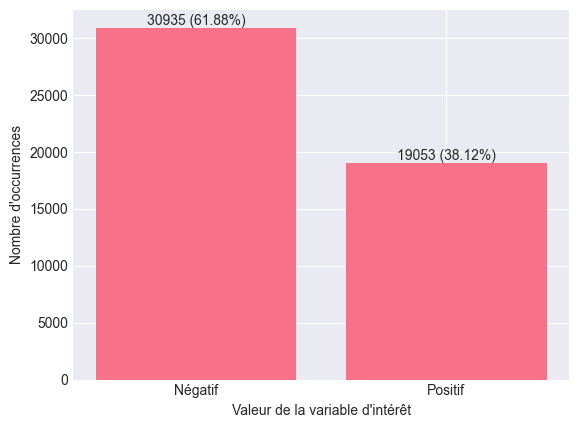

In [46]:
target_counts = df_tfidf['Recommended'].value_counts()

# Calculer la proportion pour chaque valeur de la variable d'intérêt (target)
target_proportions = df_tfidf['Recommended'].value_counts(normalize=True)

# Créer un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajouter les étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiqueter l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajouter une légende aux barres
plt.xticks(target_counts.index, ['Négatif', 'Positif'])

# Afficher le graphique
plt.show()

In [47]:
%pip install nltk
%pip install re

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [48]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Télécharger les stopwords si nécessaire
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

True

In [49]:
# Stopwords personnalisée : exclure les mots de négation
stop_words = set(stopwords.words('english'))
print(f"Stopwords: {len(stop_words)}")

# Mots à CONSERVER (négations importantes)
negation_words = {
    'no', 'not', 'nor', 'neither', 'never', 'none',
    'nobody', 'nothing', 'nowhere', 'hardly', 'scarcely',
    'barely', 'doesn', "doesn't", 'isn', "isn't", 'wasn', "wasn't",
    'shouldn', "shouldn't", 'wouldn', "wouldn't", 'couldn', "couldn't",
    'won', "won't", 'can', "can't", 'don', "don't", 'didn', "didn't"
}

# Retirer les négations des stopwords
stop_words = stop_words - negation_words
stop_words.update({'one'}) #one à exclure
print(f"Stopwords conservés: {len(stop_words)}")
print(f"Mots de négation exclus: {negation_words}")

Stopwords: 198
Stopwords conservés: 177
Mots de négation exclus: {'wasn', 'hardly', "couldn't", 'nobody', 'nor', "isn't", "doesn't", "shouldn't", 'won', "didn't", 'couldn', 'nothing', 'never', "can't", 'barely', 'can', 'scarcely', 'isn', 'don', 'didn', "won't", 'none', 'no', 'neither', 'not', "wasn't", 'shouldn', 'nowhere', "wouldn't", "don't", 'doesn', 'wouldn'}


In [50]:
def clean_text(text):

    # Suppression ✅ Trip Verified |
    text = text.split('|', 1)[-1].strip()  # garde la partie après '|'
    #.str → applique l’opération ligne par ligne

    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)

    # Conversion en minuscules
    text = text.lower()

    # Tokenisation du texte
    tokens = word_tokenize(text)

    # Suppression des mots vides
    #stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatisation des tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)

    return cleaned_text

TF-IDF (Term Frequency-Inverse Document Frequency)

C'est une technique de transformation de texte en nombres pour le machine learning.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer une instance du vectoriseur TfidfVectorizer
    # Crée un transformateur qui convertit du texte en vecteurs numériques
    # TF-IDF mesure l'importance d'un mot dans un document par rapport à tous les documents
vectorizer = TfidfVectorizer()
df_select = df_clean.copy()
# Appliquer le vectoriseur sur la colonne 'review'
features = vectorizer.fit_transform(df_select['review'].apply(clean_text)) #permet d'apprendre le vocabulaire et de transformer les documents en une matrice TF-IDF

In [70]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test de façon stratifiée
X_train, X_test, y_train, y_test = train_test_split(features, df_select['Recommended'], test_size=0.2, stratify=df_select['Recommended'], random_state=42)

In [71]:
# Construire le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = model.predict_proba(X_train)[:, 1]
#Cette fonction retourne une matrice 2D avec 2 colonnes :
# Colonne 0 : Probabilité d'être NÉGATIF (classe 0)
# Colonne 1 : Probabilité d'être POSITIF (classe 1)
# Les deux colonnes somment toujours à 1 (100%) -- on prend juste la 2ème colonne du positif car elle sert pour le calcul des métriques d'évaluation
y_test_pred = model.predict_proba(X_test)[:, 1]
# on a besoin d evaluer sur TRAIN pour voir si le modéle a bien appris
# et TEST pour vérifier si le modéle peut généraliser sur des données inconnues


In [72]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Calculer les valeurs de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

# Calculer l'AUC pour les ensembles d'entraînement et de test
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

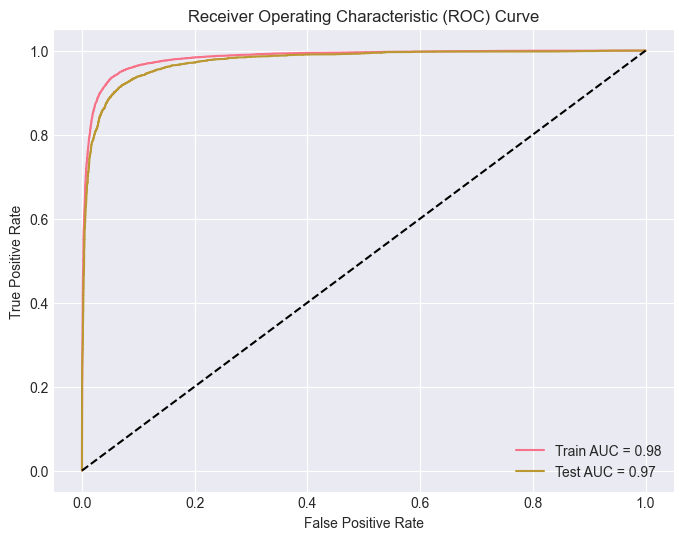

In [73]:
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [74]:
# Calculer les performances sur les ensembles d'entraînement et de test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
train_precision = precision_score(y_train, model.predict(X_train))
train_recall = recall_score(y_train, model.predict(X_train))
train_f1 = f1_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
test_precision = precision_score(y_test, model.predict(X_test))
test_recall = recall_score(y_test, model.predict(X_test))
test_f1 = f1_score(y_test, model.predict(X_test))

# Créer un tableau des performances
performance_table = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

print(performance_table)

  Performance     Train      Test
0    Accuracy  0.942486  0.926385
1   Precision  0.939129  0.921348
2      Recall  0.907952  0.882183
3    F1 Score  0.923277  0.901340


**application sur dataset**

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from scipy import sparse

# ✅ STEP 1 : Nettoyage sur TOUTE la data
df_clean['review_clean'] = df_clean['review'].apply(clean_text)

# ✅ STEP 2 : Vérifier le balance
print(df_clean['Recommended'].value_counts(normalize=True))
# Recommended

# ✅ STEP 3 : TF-IDF sur TOUTE la data (apprendre le vocabulaire complet)
# Créer une instance du vectoriseur TfidfVectorizer
    # Crée un transformateur qui convertit du texte en vecteurs numériques
    # TF-IDF mesure l'importance d'un mot dans un document par rapport à tous les documents
vectorizer = TfidfVectorizer(
    max_features=5000,  # Limiter la dimensionalité : garder les 5000 mots les plus fréquents
    min_df=5,           # Ignorer les mots qui apparaissent < 5 fois
    max_df=0.8          # Ignorer les mots trop fréquents (stop words) : on ne veut pas des mots présents dans > 80% des reviews comme "flight", "airline", etc.
)
X_tfidf = vectorizer.fit_transform(df_clean['review_clean'])  #permet d'apprendre le vocabulaire et de transformer les documents en une matrice TF-IDF

# ✅ STEP 4 : Train/Test split STRATIFIÉ (50/50 si équilibrage)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    df_clean['Recommended'],
    test_size=0.2,
    stratify=df_clean['Recommended'],  # ← IMPORTANT : préserve les proportions
    random_state=42
)

# ✅ STEP 5 : Logistic avec class weights pour compenser le déséquilibre
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

penalty = 'l2'
solver = 'saga' if sparse.issparse(X_tfidf) or penalty in ('l1', 'elasticnet') else 'lbfgs'

model = LogisticRegression(
    class_weight=class_weight_dict,
    penalty=penalty,
    solver=solver,
    max_iter=2000,
    random_state=42
)

# model = LogisticRegression(
#     class_weight=class_weight_dict,  # ← Compense le déséquilibre
#     max_iter=1000,
#     solver='lbfgs'


# )
model.fit(X_train, y_train)

# ✅ STEP 6 : Évaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.3f}")

Recommended
0    0.618849
1    0.381151
Name: proportion, dtype: float64
Accuracy: 0.924
F1-Score: 0.901
AUC-ROC: 0.975


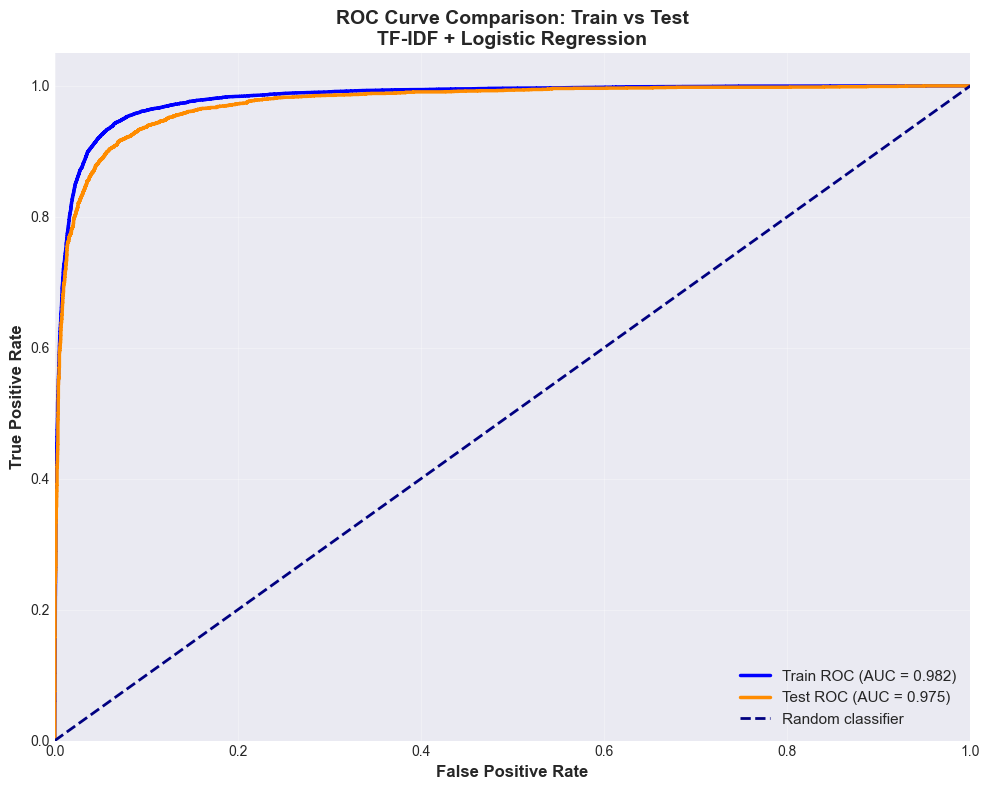

✅ Train AUC-ROC: 0.9820
✅ Test AUC-ROC: 0.9749
📊 Écart (overfitting): 0.0072


In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer les courbes ROC pour TRAIN et TEST
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les deux courbes ROC
plt.figure(figsize=(10, 8))

# Courbe TRAIN
plt.plot(fpr_train, tpr_train, color='blue', lw=2.5,
         label=f'Train ROC (AUC = {roc_auc_train:.3f})')

# Courbe TEST
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2.5,
         label=f'Test ROC (AUC = {roc_auc_test:.3f})')

# Ligne de référence (classifier aléatoire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve Comparison: Train vs Test\nTF-IDF + Logistic Regression',
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ Train AUC-ROC: {roc_auc_train:.4f}")
print(f"✅ Test AUC-ROC: {roc_auc_test:.4f}")
print(f"📊 Écart (overfitting): {(roc_auc_train - roc_auc_test):.4f}")

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculer les prédictions pour TRAIN et TEST
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculer les performances sur les ensembles d'entraînement et de test
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Créer un tableau des performances
performance_table = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1, roc_auc_train],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, roc_auc_test]
})

print("\n" + "="*60)
print("📊 TABLEAU RÉCAPITULATIF DES PERFORMANCES - TRAIN vs TEST")
print("="*60 + "\n")
print(performance_table.to_string(index=False))

print("\n" + "-"*60)
print(f"📈 Écart Train-Test (AUC-ROC): {(roc_auc_train - roc_auc_test):.4f}")
print(f"📈 Écart Train-Test (Accuracy): {(train_accuracy - test_accuracy):.4f}")
print(f"📈 Écart Train-Test (F1-Score): {(train_f1 - test_f1):.4f}")

# Diagnostic d'overfitting
if (roc_auc_train - roc_auc_test) > 0.05:
    print("\n⚠️  ATTENTION: Signes d'overfitting détectés (écart AUC > 0.05)")
elif (roc_auc_train - roc_auc_test) < 0.02:
    print("\n✅ BON ÉQUILIBRE: Pas de surapprentissage significatif")
else:
    print("\n✓  Léger overfitting acceptable")

print("\n" + "="*60 + "\n")


📊 TABLEAU RÉCAPITULATIF DES PERFORMANCES - TRAIN vs TEST

Performance    Train     Test
   Accuracy 0.939285 0.923885
  Precision 0.910022 0.891829
     Recall 0.932948 0.910785
   F1 Score 0.921342 0.901207
    AUC-ROC 0.982039 0.974876

------------------------------------------------------------
📈 Écart Train-Test (AUC-ROC): 0.0072
📈 Écart Train-Test (Accuracy): 0.0154
📈 Écart Train-Test (F1-Score): 0.0201

✅ BON ÉQUILIBRE: Pas de surapprentissage significatif




*Méthode* 3 de NLP avec sentiment

In [78]:
#%pip install textblob
from textblob import TextBlob

In [79]:
# Calcule de la polarité = sentiment[0]
df_sentiment = df.copy()
df_sentiment['texte_nettoye'] = df_sentiment['review'].apply(clean_text)
df_sentiment['polarity'] = df_sentiment['texte_nettoye'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Définir les étiquettes de sentiment en fonction de la polarité
df_sentiment['Sentiment'] = df_sentiment['polarity'].apply(lambda x: 'Positif' if x > 0 else ('Négatif' if x < 0 else 'Neutre'))

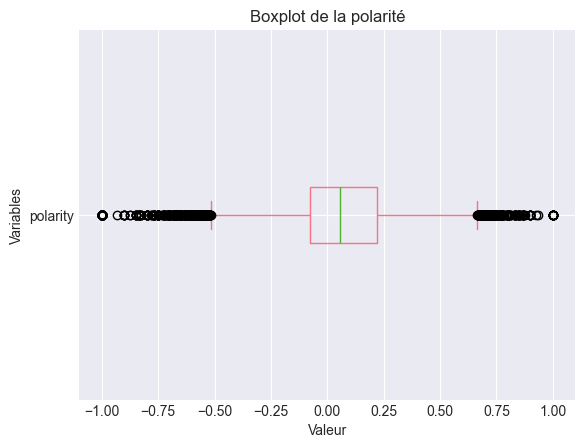

In [80]:
# Tracer le boxplot pour la polarité
df_sentiment['polarity'].plot(kind='box', vert=False)

# Ajouter des titres et des étiquettes d'axe
plt.title('Boxplot de la polarité')
plt.xlabel('Valeur')
plt.ylabel('Variables')

# Afficher le boxplot
plt.show()

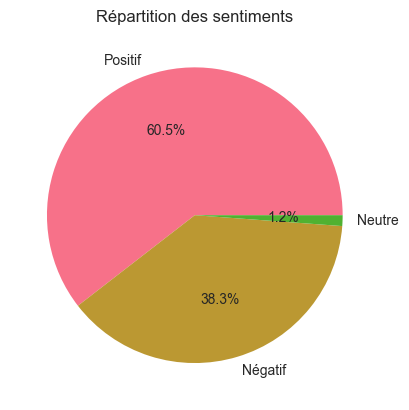

In [81]:
# Compter le nombre de chaque sentiment
sentiment_counts = df_sentiment['Sentiment'].value_counts()

# Obtenir les étiquettes de sentiment et les valeurs correspondantes
labels = sentiment_counts.index.tolist()
values = sentiment_counts.values.tolist()

# Tracer le diagramme circulaire
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Ajouter un titre
plt.title("Répartition des sentiments")

# Afficher le diagramme circulaire
plt.show()

In [82]:
# Filtrer les tweets positifs
tweets_positifs = df_sentiment[df_sentiment['polarity']>0]['texte_nettoye']
# Filtrer les tweets negatifs
tweets_negatifs = df_sentiment[df_sentiment['polarity'] < 0]['texte_nettoye']
# Filtrer les tweets neutre
tweets_neutre = df_sentiment[df_sentiment['polarity'] ==0]['texte_nettoye']

In [83]:
# Breaking down the tweets into words in seperate categories
positive_tokens = [token for line in tweets_positifs for token in line.split()]
negative_tokens = [token for line in tweets_negatifs for token in line.split()]
neutral_tokens = [token for line in tweets_neutre for token in line.split()]

**Recalculer** les métriques dans la cellule d'évaluation :

✅ Évite les bugs d'ordre d'exécution

✅ Rend le code plus lisible et maintenable

✅ Garantit la cohérence des résultats

In [84]:
df_sentiment['Recommended'] = np.where(
    df_sentiment['Recommended'].str.strip().str.lower() == 'yes', 1, 0)

In [85]:
# =============== ÉVALUATION AUTOMATIQUE DES 3 MÉTHODES ===============

from sklearn.metrics import accuracy_score, f1_score
from textblob import TextBlob

# --- MÉTHODE 1: VADER ---
sia = SentimentIntensityAnalyzer()
df_vader['vader_sentiment'] = df_vader['review'].apply(
    lambda x: 1 if sia.polarity_scores(str(x))['compound'] > 0.1 else 0
)
vader_accuracy = accuracy_score(df_vader['Recommended'], df_vader['vader_sentiment'])
vader_f1 = f1_score(df_vader['Recommended'], df_vader['vader_sentiment'])
# --- MÉTHODE 2: TF-IDF + Logistic ---
y_pred_tfidf = model.predict(X_test)  # Refaire la prédiction
tfidf_accuracy = accuracy_score(y_test, y_pred_tfidf)
tfidf_f1 = f1_score(y_test, y_pred_tfidf)

# --- MÉTHODE 3: TextBlob ---
df_sentiment['textblob_sentiment'] = df_sentiment['review'].apply(
    lambda x: 1 if TextBlob(str(x)).sentiment.polarity > 0.1 else 0
)
textblob_accuracy = accuracy_score(df_sentiment['Recommended'], df_sentiment['textblob_sentiment'])
textblob_f1 = f1_score(df_sentiment['Recommended'], df_sentiment['textblob_sentiment'])
# --- COMPARAISON AUTOMATIQUE ---
results = pd.DataFrame({
    'Méthode': ['VADER', 'TF-IDF + Logistic', 'TextBlob'],
    'Accuracy': [vader_accuracy, tfidf_accuracy, textblob_accuracy],
    'F1-Score': [vader_f1, tfidf_f1, textblob_f1]
})


print(results.to_string(index=False))
best_method = results.loc[results['Accuracy'].idxmax(), 'Méthode']
print(f"\n✅ MEILLEURE MÉTHODE: {best_method}")

          Méthode  Accuracy  F1-Score
            VADER  0.817796  0.791063
TF-IDF + Logistic  0.923885  0.901207
         TextBlob  0.831000  0.792324

✅ MEILLEURE MÉTHODE: TF-IDF + Logistic


application tf-idf + logistic regression sur df_clean

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from scipy import sparse  # issparse, CSR/CSC, etc.

# ✅ STEP 1 : Nettoyage sur TOUTE la data
df_clean['review_clean'] = df_clean['review'].apply(clean_text)

# ✅ STEP 2 : Vérifier le balance
print(df_clean['Recommended'].value_counts(normalize=True))
# Recommended

# ✅ STEP 3 : TF-IDF sur TOUTE la data (apprendre le vocabulaire complet)
# Créer une instance du vectoriseur TfidfVectorizer
    # Crée un transformateur qui convertit du texte en vecteurs numériques
    # TF-IDF mesure l'importance d'un mot dans un document par rapport à tous les documents
vectorizer = TfidfVectorizer(
    max_features=5000,  # Limiter la dimensionalité : garder les 5000 mots les plus fréquents
    min_df=5,           # Ignorer les mots qui apparaissent < 5 fois
    max_df=0.8          # Ignorer les mots trop fréquents (stop words) : on ne veut pas des mots présents dans > 80% des reviews comme "flight", "airline", etc.
)
X_tfidf = vectorizer.fit_transform(df_clean['review_clean'])  #permet d'apprendre le vocabulaire et de transformer les documents en une matrice TF-IDF

# ✅ STEP 4 : Train/Test split STRATIFIÉ (50/50 si équilibrage)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    df_clean['Recommended'],
    test_size=0.2,
    stratify=df_clean['Recommended'],  # ← IMPORTANT : préserve les proportions
    random_state=42
)

# ✅ STEP 5 : Logistic avec class weights pour compenser le déséquilibre
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

penalty = 'l2'
solver = 'saga' if sparse.issparse(X_tfidf) or penalty in ('l1', 'elasticnet') else 'lbfgs'

model = LogisticRegression(
    class_weight=class_weight_dict,
    penalty=penalty,
    solver=solver,
    max_iter=2000,
    random_state=42
)

model.fit(X_train, y_train)

# ✅ STEP 6 : Évaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.3f}")

Recommended
0    0.618849
1    0.381151
Name: proportion, dtype: float64
Accuracy: 0.924
F1-Score: 0.901
AUC-ROC: 0.975


In [87]:
df_catboost = df_clean.copy()

In [88]:
df_catboost=df_catboost.drop(columns=['review'])

In [89]:
#Au lieu de garder review (texte brut), on peut ajouter une colonne review_sentiment_score qui contient la probabilité prédite par le modèle TF-IDF + Logistic Regression.

# ========== AJOUT COLONNE SCORE SENTIMENT ==========
print("\n" + "="*70)
print("🔄 AJOUT COLONNE review_sentiment_score à df_clean")
print("="*70 + "\n")

# 1️⃣ Vectoriser TOUTES les reviews de df_clean
X_all_tfidf = vectorizer.transform(df_clean['review_clean'])

# 2️⃣ Prédire les probabilités pour TOUTES les reviews
# predict_proba retourne [prob_classe_0, prob_classe_1]
# On prend [:, 1] pour avoir la probabilité de Recommended = 1 (positif)
df_clean['review_sentiment_score'] = model.predict_proba(X_all_tfidf)[:, 1]

# 3️⃣ Classer le sentiment en 3 catégories
def classify_review_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < 0.5:
        return 'Negative'
    else:
        return 'Neutral'

df_clean['review_sentiment_label'] = df_clean['review_sentiment_score'].apply(classify_review_sentiment)

# 4️⃣ Supprimer la colonne de score comme demandé
df_clean.drop(columns=['review_sentiment_score'], inplace=True)

print("✅ Colonnes 'review_sentiment_score' et 'review_sentiment_label' ajoutées avec succès")
print(f"\nStatistiques du score sentiment (review_sentiment_score est maintenant supprimée):")
# Removed print statements for min, max, mean, median as the column is dropped.

# Afficher la distribution des labels
print("\nDistribution des labels de sentiment:")
print(df_clean['review_sentiment_label'].value_counts())

# 5️⃣ Afficher quelques exemples
print(f"\nExemples de reviews avec leur label:")
sample = df_clean[['review', 'review_sentiment_label', 'Recommended']].head(10)
print(sample.to_string(index=False))

print("\n" + "="*70 + "\n")


🔄 AJOUT COLONNE review_sentiment_score à df_clean

✅ Colonnes 'review_sentiment_score' et 'review_sentiment_label' ajoutées avec succès

Statistiques du score sentiment (review_sentiment_score est maintenant supprimée):

Distribution des labels de sentiment:
review_sentiment_label
Negative    30470
Positive    19518
Name: count, dtype: int64

Exemples de reviews avec leur label:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [90]:
# ========== SUPPRESSION DES COLONNES TEXTUELLES ==========
print("\n🗑️ Suppression des colonnes textuelles (review, review_clean)...")
df_clean=df_clean.drop(columns=['review', 'review_clean'], errors='ignore')

print("✅ Colonnes textuelles supprimées")
print(f"✅ Shape finale: {df_clean.shape}")
print(f"✅ Colonnes restantes: {df_clean.columns.tolist()}")


🗑️ Suppression des colonnes textuelles (review, review_clean)...
✅ Colonnes textuelles supprimées
✅ Shape finale: (49988, 14)
✅ Colonnes restantes: ['airline', 'rating', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value For Money', 'Recommended', 'Food & Beverages', 'Inflight Entertainment', 'review_sentiment_label']


**TRANSFOMATION**

In [91]:
# One-Hot Encode remaining categorical features (Type Of Traveller, Seat Type)

categorical_for_ohe = ['Type Of Traveller', 'Seat Type']

print(f"\nOne-Hot Encoding {len(categorical_for_ohe)} categorical columns: {categorical_for_ohe}")

# Apply get_dummies to df_clean itself, not df_optimized, to preserve previous cleaning steps
df_clean = pd.get_dummies(df_clean, columns=categorical_for_ohe, dummy_na=False, drop_first=True)

print("✓ Categorical columns one-hot encoded.")


One-Hot Encoding 2 categorical columns: ['Type Of Traveller', 'Seat Type']
✓ Categorical columns one-hot encoded.


**Recommended**

In [92]:
#Recommended a une NAN => solution : supprimer cette ligne car on perd 1 ligne sur 50142 (0.002%), aucun impact
df_clean = df_clean.dropna(subset=['Recommended'])
df_catboost = df_catboost.dropna(subset=['Recommended'])

**Route**
### Traitement de la colonne 'Route' : Extraction des villes de départ et d'arrivée

In [93]:
# Split Route par regex case-insensitive " to/To "
split_result = df_clean['Route'].str.split(r'\s+[Tt]o\s+', n=1, expand=True, regex=True)

print(f"Shape de split_result: {split_result.shape}")
print(f"Colonnes: {split_result.columns.tolist()}")

# Extraire departure (première colonne)
df_clean['departure_country'] = split_result[0].str.strip()
df_catboost['departure_country'] = split_result[0].str.strip()
# Extraire destination (deuxième colonne) - gérer le cas où il y a < 2 colonnes
if len(split_result.columns) > 1:
    df_clean['destination_country'] = split_result[1].str.strip()
    df_catboost['destination_country'] = split_result[1].str.strip()
else:
    df_clean['destination_country'] = 'Unknown'
    df_catboost['destination_country'] = 'Unknown'

# Si Route était NaN, mettre "Unknown" pour departure et destination
mask_unknown = df_clean['Route'].isna()
df_clean.loc[mask_unknown, 'departure_country'] = 'Unknown'
df_catboost.loc[mask_unknown, 'departure_country'] = 'Unknown'
df_clean.loc[mask_unknown, 'destination_country'] = 'Unknown'
df_catboost.loc[mask_unknown, 'destination_country'] = 'Unknown'
# Remplir les NaN restantes
df_clean['departure_country'].fillna('Unknown', inplace=True)
df_catboost['departure_country'].fillna('Unknown', inplace=True)
df_clean['destination_country'].fillna('Unknown', inplace=True)
df_catboost['destination_country'].fillna('Unknown', inplace=True)

print("\n✅ Extraction CORRIGÉE:")
print(f"   Samples de departure_country:\n   {df_clean['departure_country'].head(5).tolist()}")
print(f"   Samples de destination_country:\n   {df_clean['destination_country'].head(5).tolist()}")
print(f"   NaN dans departure_country: {df_clean['departure_country'].isna().sum()}")
print(f"   NaN dans destination_country: {df_clean['destination_country'].isna().sum()}")


Shape de split_result: (49988, 2)
Colonnes: [0, 1]

✅ Extraction CORRIGÉE:
   Samples de departure_country:
   ['San Francisco', 'Basel', 'St Lucia', 'London', 'Gatwick']
   Samples de destination_country:
   ['London', 'London', 'London Gatwick', 'New Orleans', 'Tenerife South']
   NaN dans departure_country: 0
   NaN dans destination_country: 0


In [94]:
df_clean.head(3)

,airline,rating,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,...,review_sentiment_label,Type Of Traveller_Couple Leisure,Type Of Traveller_Family Leisure,Type Of Traveller_Solo Leisure,Type Of Traveller_Unknown,Seat Type_Economy Class,Seat Type_First Class,Seat Type_Premium Economy,departure_country,destination_country
0,British Airways,3,San Francisco To London,October 2025,3,2,1,2,0,3,...,Negative,False,False,True,False,False,False,False,San Francisco,London
1,British Airways,1,Basel To London,November 2025,3,5,2,1,0,5,...,Negative,False,False,False,False,False,False,False,Basel,London
2,British Airways,3,St Lucia To London Gatwick,November 2025,1,1,3,3,0,1,...,Negative,True,False,False,False,True,False,False,St Lucia,London Gatwick


In [95]:
from sklearn.feature_selection import mutual_info_classif

# departure_country et destination_country sont des var categorilles a ce niveau
# mutual_info_classif n’accepte que des nombres, pas des strings.
# on utilise (cat.codes)
# L’encodage (cat.codes) n’est utilisé que pour transformer les catégories en nombres afin que mutual_info_classif puisse les traiter.
# Ce n’est pas un encodage “sémantique” ou destiné au modèle final, juste un encodage temporaire pour le calcul de l’information mutuelle.

# Sélection des colonnes
X = df_clean[['departure_country', 'destination_country']]

# Encodage temporaire pour MI
X_enc = X.astype('category').apply(lambda x: x.cat.codes)

# Cible
y = df_clean['Recommended']

# Calcul de l’information mutuelle
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(
    X_enc,
    y,
    discrete_features=True,
    random_state=42
)

print("Mutual Information depart/destination:", mi)

Mutual Information depart/destination: [0.09896119 0.17194129]


In [96]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_clean['departure_country'], df['Recommended'])
chi2, p_value, _, _ = chi2_contingency(contingency)

print("p-value :", p_value)

p-value : 0.0


In [97]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_clean['destination_country'], df['Recommended'])
chi2, p_value, _, _ = chi2_contingency(contingency)

print("p-value :", p_value)

p-value : 0.0


In [98]:
#maintenant, on peut supprimer ces 2 colonnes
df_clean=df_clean.drop(columns=['Route', 'departure_country', 'destination_country'])
df_catboost = df_catboost.drop(columns=['Route', 'departure_country', 'destination_country'])
print("✅ Colonnes de villes supprimées - trop fragmentées")

✅ Colonnes de villes supprimées - trop fragmentées


**Date Flown**

In [99]:
df['Date Flown'].dtype

dtype('O')

In [100]:
df['Date Flown'].head()

0     October 2025
1    November 2025
2    November 2025
3    November 2025
4    November 2025
Name: Date Flown, dtype: object

In [101]:
# df_clean['Date Flown'] = pd.to_datetime(df['Date Flown'], errors='coerce')
# df_clean['Date Flown'].head()
# ========== IMPUTATION SIMPLE ET DIRECTE ==========
# Convertir Date Flown en datetime (NaN → NaT)
df_clean['Date Flown'] = pd.to_datetime(df_clean['Date Flown'], errors='coerce')

# Créer une fonction pour imputer les NaT avec la date la plus fréquente du groupe
def fill_date_with_mode(group):
    if group.isna().any() and group.notna().sum() > 0:
        mode_date = group.dropna().mode()
        if len(mode_date) > 0:
            group.fillna(mode_date[0], inplace=True)
    return group

# Appliquer le groupby pour chaque groupe (airline) — les colonnes villes ont été supprimées plus haut
df_clean['Date Flown'] = df_clean.groupby(['airline'])['Date Flown'].transform(fill_date_with_mode)

# Si encore des NaT (groupes sans dates), remplir avec la date globale la plus fréquente
global_mode = df_clean['Date Flown'].dropna().mode()
if len(global_mode) > 0:
    df_clean['Date Flown'].fillna(global_mode[0], inplace=True)

print(f"✅ NaT restantes après imputation: {df_clean['Date Flown'].isna().sum()}")


✅ NaT restantes après imputation: 0


In [102]:
df_clean['Date Flown'].dtype

dtype('<M8[ns]')

In [103]:
df_clean['flown_year'] = df_clean['Date Flown'].dt.year
df_clean['flown_month'] = df_clean['Date Flown'].dt.month

In [104]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_clean['flown_month'], df_clean['Recommended'])
chi2, p_value, _, _ = chi2_contingency(contingency)
print("p-value month:", p_value)

p-value month: 1.0621689777563447e-118


In [105]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_clean['flown_year'], df_clean['Recommended'])
chi2, p_value, _, _ = chi2_contingency(contingency)
print("p-value year:", p_value)

p-value year: 0.0


In [106]:
from sklearn.feature_selection import mutual_info_classif

X = df_clean[['flown_month', 'flown_year']].fillna(-1)  # ou dropna()
y = df_clean['Recommended']

mi = mutual_info_classif(X, y, discrete_features=True, random_state=42)
print("Mutual Information:", mi)


Mutual Information: [0.00587393 0.0454195 ]


In [107]:
#on décide de supprimer colonne date

df_clean = df_clean.drop(columns=['Date Flown', 'flown_year', 'flown_month'])
df_catboost = df_catboost.drop(columns=['Date Flown'])

In [108]:
df_clean['Recommended'] = df_clean['Recommended'].astype('UInt8')
df_catboost['Recommended'] = df_catboost['Recommended'].astype('UInt8')

Dataframe apres nettoyage:

In [109]:
# Afficher toutes les colonnes et leurs valeurs nulles (SANS TRONCATURE)
print("\n" + "="*70)
print("TABLEAU COMPLET - TOUTES LES COLONNES ET VALEURS NULLES")
print("="*70 + "\n")
print(f"shape: {df_clean.shape}")
print(f"size: {df_clean.size}")
# Configurer pandas pour afficher TOUTES les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Créer un tableau avec toutes les infos
missing_info = pd.DataFrame({
    'Colonne': df_clean.columns,
    'Type de données': df_clean.dtypes.values,
    'Valeurs nulles': df_clean.isnull().sum().values,
    'Pourcentage nulles': (df_clean.isnull().sum().values / len(df_clean) * 100).round(2),
    'Non-nulles': (len(df_clean) - df_clean.isnull().sum().values),
    'Unique': [df_clean[col].nunique() for col in df_clean.columns]
})

# Afficher le tableau complet
print(missing_info.to_string(index=False))

print("\n" + "-"*70)
print(f"\n✅ Total colonnes : {len(df_clean.columns)}")
print(f"✅ Total lignes : {len(df_clean)}")
print(f"✅ Valeurs nulles totales : {df_clean.isnull().sum().sum()}")
print("\n" + "="*70 + "\n")


TABLEAU COMPLET - TOUTES LES COLONNES ET VALEURS NULLES

shape: (49988, 17)
size: 849796
                         Colonne Type de données  Valeurs nulles  Pourcentage nulles  Non-nulles  Unique
                         airline          object               0                 0.0       49988      86
                          rating            Int8               0                 0.0       49988      10
                    Seat Comfort            Int8               0                 0.0       49988       6
             Cabin Staff Service            Int8               0                 0.0       49988       6
                  Ground Service            Int8               0                 0.0       49988       5
                 Value For Money            Int8               0                 0.0       49988       6
                     Recommended           UInt8               0                 0.0       49988       2
                Food & Beverages            Int8               0      

In [110]:
df_clean.head(3)

,airline,rating,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,review_sentiment_label,Type Of Traveller_Couple Leisure,Type Of Traveller_Family Leisure,Type Of Traveller_Solo Leisure,Type Of Traveller_Unknown,Seat Type_Economy Class,Seat Type_First Class,Seat Type_Premium Economy
0,British Airways,3,3,2,1,2,0,3,3,Negative,False,False,True,False,False,False,False
1,British Airways,1,3,5,2,1,0,5,3,Negative,False,False,False,False,False,False,False
2,British Airways,3,1,1,3,3,0,1,3,Negative,True,False,False,False,True,False,False


# Encodage

object => label encoder (airline non)

bool=> astype(int)



In [111]:
df_encode=df_clean.copy()
# Identifier colonnes object ET bool (SAUF 'airline' - 86 catégories)
object_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
bool_cols = df_clean.select_dtypes(include=['bool']).columns.tolist()

# Exclure 'airline' car trop de catégories - sera Target Encoded séparément
if 'airline' in object_cols:
    object_cols.remove('airline')

categorical_cols_to_encode = object_cols + bool_cols
print(f"Colonnes à encoder: {categorical_cols_to_encode}")

Colonnes à encoder: ['review_sentiment_label', 'Type Of Traveller_Couple Leisure', 'Type Of Traveller_Family Leisure', 'Type Of Traveller_Solo Leisure', 'Type Of Traveller_Unknown', 'Seat Type_Economy Class', 'Seat Type_First Class', 'Seat Type_Premium Economy']


In [112]:
#touver solution pour airline

# Target Encoding pour 'airline' (remplace par la moyenne Recommended)
if 'airline' in df_clean.columns:
    airline_target_mean = df_encode.groupby('airline')['Recommended'].transform('mean')
    df_encode['airline'] = airline_target_mean
    print(f"✓ airline: Target Encoded")
    print(f"  Min: {airline_target_mean.min():.3f} | Max: {airline_target_mean.max():.3f}")

✓ airline: Target Encoded
  Min: 0.000 | Max: 0.868


In [113]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols_to_encode:
    if col in bool_cols:
        # Convertir True→1, False→0
        df_encode[col] = df_encode[col].astype(int)
        print(f"✓ {col} (bool): False→0, True→1")
    else:
        le = LabelEncoder()
        df_encode[col] = le.fit_transform(df_encode[col])
        print(f"✓ {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

✓ review_sentiment_label: {'Negative': np.int64(0), 'Positive': np.int64(1)}
✓ Type Of Traveller_Couple Leisure (bool): False→0, True→1
✓ Type Of Traveller_Family Leisure (bool): False→0, True→1
✓ Type Of Traveller_Solo Leisure (bool): False→0, True→1
✓ Type Of Traveller_Unknown (bool): False→0, True→1
✓ Seat Type_Economy Class (bool): False→0, True→1
✓ Seat Type_First Class (bool): False→0, True→1
✓ Seat Type_Premium Economy (bool): False→0, True→1


# PHASE 6 : MODELISATION

Préparation des données à la modélisation:

In [114]:
#1. Split commun sur les indices
df_enc = df_encode.copy()      # encodé, pour LR / RF / XGB
df_raw = df_catboost.copy()    # non encodé mais même lignes, pour CatBoost

# Vérifier que les index correspondent bien
assert (df_enc.index == df_raw.index).all()

X_enc = df_enc.drop(columns=["Recommended"])
y     = df_enc["Recommended"]  # même cible pour tous

from sklearn.model_selection import train_test_split

# ici on split uniquement les INDEX
idx_train, idx_test = train_test_split(
    df_enc.index,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [115]:
#2. Jeux train/test pour chaque modèle
X_train_enc = X_enc.loc[idx_train]
X_test_enc  = X_enc.loc[idx_test]
y_train     = y.loc[idx_train]
y_test      = y.loc[idx_test]


In [116]:
# Install catboost if not already installed
#!pip install catboost

# Modéles linéaire: LogisticRegression

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import uniform


# =========================
# 1) Préparation (scaling)
# =========================
scaler = StandardScaler()  # standardisation pour que les coefficients soient comparables
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled  = scaler.transform(X_test_enc)


# =========================
# 2) RFE pour réduire les features
# =========================
base_log_reg = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

n_features_lr = 10
rfe_lr = RFE(estimator=base_log_reg, n_features_to_select=n_features_lr)
rfe_lr.fit(X_train_scaled, y_train)

selected_mask_lr = rfe_lr.support_
selected_features_lr = X_train_enc.columns[selected_mask_lr]

X_train_sel_lr = X_train_scaled[:, selected_mask_lr]
X_test_sel_lr  = X_test_scaled[:, selected_mask_lr]

print("Features LR sélectionnées :", list(selected_features_lr))


# =========================
# 3) RandomizedSearchCV sur Logistic Regression
# =========================
param_dist_lr = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": uniform(0.001, 10),      # C dans ~ [0.001, 10]
    "l1_ratio": uniform(0.0, 1.0) # utilisé si penalty="elasticnet"
}

log_base = LogisticRegression(
    solver="saga",         # supporte l1 et elasticnet
    max_iter=2000,
    class_weight="balanced",
    random_state=42
)

rand_lr = RandomizedSearchCV(
    estimator=log_base,
    param_distributions=param_dist_lr,
    n_iter=30,             # nombre de combinaisons tirées au hasard
    cv=3,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rand_lr.fit(X_train_sel_lr, y_train)

best_lr = rand_lr.best_estimator_
print("\n=== LOGISTIC REGRESSION - RANDOMIZED SEARCH ===")
print("Meilleurs paramètres :", rand_lr.best_params_)
print("Meilleur score CV F1 :", rand_lr.best_score_)


# =========================
# 4) Metrics TRAIN
# =========================
y_train_pred_lr  = best_lr.predict(X_train_sel_lr)
y_train_proba_lr = best_lr.predict_proba(X_train_sel_lr)[:, 1]

f1_train_lr  = f1_score(y_train, y_train_pred_lr)
acc_train_lr = accuracy_score(y_train, y_train_pred_lr)
auc_train_lr = roc_auc_score(y_train, y_train_proba_lr)


# =========================
# 5) Metrics TEST
# =========================
y_test_pred_lr  = best_lr.predict(X_test_sel_lr)
y_test_proba_lr = best_lr.predict_proba(X_test_sel_lr)[:, 1]

f1_test_lr  = f1_score(y_test, y_test_pred_lr)
acc_test_lr = accuracy_score(y_test, y_test_pred_lr)
auc_test_lr = roc_auc_score(y_test, y_test_proba_lr)

print("\n=== LOGISTIC REGRESSION - TEST ===")
print(f"Accuracy : {acc_test_lr:.3f}")
print(f"F1-score : {f1_test_lr:.3f}")
print(f"AUC-ROC  : {auc_test_lr:.3f}")


Features LR sélectionnées : ['airline', 'rating', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value For Money', 'Food & Beverages', 'Inflight Entertainment', 'review_sentiment_label', 'Type Of Traveller_Unknown']
Fitting 3 folds for each of 30 candidates, totalling 90 fits

=== LOGISTIC REGRESSION - RANDOMIZED SEARCH ===
Meilleurs paramètres : {'C': np.float64(0.1573640674119393), 'l1_ratio': np.float64(0.4234014807063696), 'penalty': 'l1'}
Meilleur score CV F1 : 0.9522294640514607

=== LOGISTIC REGRESSION - TEST ===
Accuracy : 0.961
F1-score : 0.949
AUC-ROC  : 0.991


**RFE se base sur Hyperparameter tuning « RandomizedSearchCV » ou bien comment ?**

RFE et RandomizedSearchCV sont deux outils *différents* et *indépendants*

1.   Rôle de Hyperparameter tuning:

il joue sur les valeurs d’hyperparamètres du modèle : par exemple C, penalty, max_depth, n_estimators, etc.

Il entraîne plein de modèles avec différentes combinaisons de ces valeurs et choisit celle qui donne la meilleure métrique en validation croisée (F1, AUC, accuracy…).

2.   Rôle de RFE:

RFE joue sur les variables/features : il part de toutes les colonnes, entraîne le modèle, mesure l’importance des features, enlève les moins importantes, réentraîne, et ainsi de suite.

À la fin, il ne garde qu’un sous‑ensemble de colonnes (par exemple les 10 plus importantes) avec les hyperparamètres que tu as fixés pour le modèle de base.

**CONCLUSION**

GridSearchCV = choisir comment le modèle est paramétré (les valeurs).

RFE = choisir sur quoi le modèle travaille (les features).

# Modéles d'ensembles:

Un modèle d’ensemble (ensemble model) est un modèle qui combine plusieurs modèles de machine learning pour produire une seule prédiction.

###   Random Forest:





Modèle d’ensemble de type **bagging** : moyenne / vote de **beaucoup d’arbres** de décision **entraînés en parallèle** sur des sous‑échantillons de données et de features.


In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from scipy.stats import randint


# =========================
# 1) Sélection de features (RFE)
# =========================

base_rf_rfe = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"
)

n_features_rf = 15
rfe_rf = RFE(estimator=base_rf_rfe, n_features_to_select=n_features_rf, step=1)
rfe_rf.fit(X_train_enc, y_train)

selected_mask_rf = rfe_rf.support_
X_train_sel_rf = X_train_enc.iloc[:, selected_mask_rf]
X_test_sel_rf  = X_test_enc.iloc[:, selected_mask_rf]
print("Features sélectionnées RF :", list(X_train_enc.columns[selected_mask_rf]))


# =========================
# 2) RandomizedSearchCV sur Random Forest
# =========================

rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
    min_samples_split=2,
    min_samples_leaf=1
)

param_dist = {
    "n_estimators": randint(100, 401),  # 100 à 400
    "max_depth":   [5, 10],
    "max_features": ["sqrt", 0.7]
#Comme min_samples_split=2 et min_samples_leaf=1 sont déjà des valeurs standards et raisonnables on peut réduire l’espace de recherche et donc le temps de calcul et retirer ces deux hyperparamètres
#Si on ne mets pas min_samples_split et min_samples_leaf dans param_dist, RandomizedSearchCV ne les touche pas et le modèle utilise simplement les valeurs définies dans rf_base.
}

rand_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=30, # nb de combinaisons testées
    cv=3,
    scoring="f1", # ou "roc_auc", "accuracy"
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rand_search.fit(X_train_sel_rf, y_train)

print("\n=== RANDOMIZED SEARCH ===")
print("Meilleurs paramètres :", rand_search.best_params_)
print("Meilleur score CV F1 :", rand_search.best_score_)


# =========================
# 3) Meilleur modèle + Metrics TRAIN
# =========================

best_rf_rand = rand_search.best_estimator_

y_train_pred_rf  = best_rf_rand.predict(X_train_sel_rf)
y_train_proba_rf = best_rf_rand.predict_proba(X_train_sel_rf)[:, 1]

acc_train_rf = accuracy_score(y_train, y_train_pred_rf)
f1_train_rf  = f1_score(y_train, y_train_pred_rf)
auc_train_rf = roc_auc_score(y_train, y_train_proba_rf)

print("\n=== RANDOM FOREST (RandomizedSearch) - TRAIN ===")
print(f"Accuracy : {acc_train_rf:.3f}")
print(f"F1-score : {f1_train_rf:.3f}")
print(f"AUC-ROC  : {auc_train_rf:.3f}")


# =========================
# 4) Metrics TEST
# =========================

y_test_pred_rf  = best_rf_rand.predict(X_test_sel_rf)
y_test_proba_rf = best_rf_rand.predict_proba(X_test_sel_rf)[:, 1]

acc_test_rf = accuracy_score(y_test, y_test_pred_rf)
f1_test_rf  = f1_score(y_test, y_test_pred_rf)
auc_test_rf = roc_auc_score(y_test, y_test_proba_rf)

print("\n=== RANDOM FOREST (RandomizedSearch) - TEST ===")
print(f"Accuracy : {acc_test_rf:.3f}")
print(f"F1-score : {f1_test_rf:.3f}")
print(f"AUC-ROC  : {auc_test_rf:.3f}")

Features sélectionnées RF : ['airline', 'rating', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value For Money', 'Food & Beverages', 'Inflight Entertainment', 'review_sentiment_label', 'Type Of Traveller_Couple Leisure', 'Type Of Traveller_Family Leisure', 'Type Of Traveller_Solo Leisure', 'Type Of Traveller_Unknown', 'Seat Type_Economy Class', 'Seat Type_Premium Economy']
Fitting 3 folds for each of 30 candidates, totalling 90 fits

=== RANDOMIZED SEARCH ===
Meilleurs paramètres : {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 230}
Meilleur score CV F1 : 0.9555209947549295

=== RANDOM FOREST (RandomizedSearch) - TRAIN ===
Accuracy : 0.975
F1-score : 0.968
AUC-ROC  : 0.996

=== RANDOM FOREST (RandomizedSearch) - TEST ===
Accuracy : 0.964
F1-score : 0.952
AUC-ROC  : 0.992


###XGBoost:





Modèles d’ensemble de type **gradient boosting** : on **ajoute** des arbres **séquentiellement**, chaque nouvel arbre corrige les erreurs des précédents.

**xgb**: ne gérait que les var **numériques** : il fallait encoder les variables catégorielles à l'avance.

In [119]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from scipy.stats import randint, uniform

# =========================
# 1) Base model + search space
# =========================

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos #scale_pos_weight = proportion de déséquilibre entre les classes → permet à XGBoost de corriger le déséquilibre des classes (poids plus fort pour la classe minoritaire).
xgb_base = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss", #eval_metric="logloss" : métrique d’évaluation interne pendant l’apprentissage.
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    tree_method="hist",
)

param_dist_xgb = {
    "n_estimators":      randint(200, 601),
    "learning_rate":     uniform(0.01, 0.19),   # 0.01–0.2
    "max_depth":         randint(3, 9),         # 3–8
    "subsample":         uniform(0.6, 0.4),     # 0.6–1.0
    "colsample_bytree":  uniform(0.6, 0.4),     # 0.6–1.0
    "min_child_weight":  randint(1, 7),
    "gamma":             uniform(0.0, 5.0),
    "reg_lambda":        uniform(0.5, 2.0)
}

rand_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=40,
    cv=3,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# =========================
# 2) Randomized search + best model
# =========================

rand_xgb.fit(X_train_enc, y_train)

best_xgb = rand_xgb.best_estimator_
print("Best params XGB :", rand_xgb.best_params_)
print("Best CV F1      :", rand_xgb.best_score_)

# =========================
# 3) Metrics TRAIN
# =========================

y_train_pred_xgb  = best_xgb.predict(X_train_enc)
y_train_proba_xgb = best_xgb.predict_proba(X_train_enc)[:, 1]

f1_train_xgb  = f1_score(y_train, y_train_pred_xgb)
acc_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
auc_train_xgb = roc_auc_score(y_train, y_train_proba_xgb)

print("\n=== XGBOOST - TRAIN ===")
print(f"Accuracy : {acc_train_xgb:.3f}")
print(f"F1-score : {f1_train_xgb:.3f}")
print(f"AUC-ROC  : {auc_train_xgb:.3f}")

# =========================
# 4) Metrics TEST (seuil 0.5)
# =========================

y_test_pred_xgb  = best_xgb.predict(X_test_enc)
y_test_proba_xgb = best_xgb.predict_proba(X_test_enc)[:, 1]

f1_test_xgb  = f1_score(y_test, y_test_pred_xgb)
acc_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
auc_test_xgb    = roc_auc_score(y_test, y_test_proba_xgb)

print("\n=== XGBOOST - TEST (threshold=0.5) ===")
print(f"Accuracy : {acc_test_xgb:.3f}")
print(f"F1-score : {f1_test_xgb:.3f}")
print(f"AUC-ROC  : {auc_test_xgb:.3f}")

# =========================
# 5) Recherche du meilleur seuil pour F1
# =========================

thresholds = np.linspace(0.1, 0.9, 17)
best_thr, best_f1 = 0.5, f1_test_xgb

for thr in thresholds:
    y_pred_thr = (y_test_proba_xgb >= thr).astype(int)
    f1 = f1_score(y_test, y_pred_thr)
    if f1 > best_f1:
        best_f1, best_thr = f1, thr

print("\n=== XGBOOST - TEST (threshold optimisé) ===")
print(f"Meilleur seuil : {best_thr:.2f}")
print(f"Meilleur F1    : {best_f1:.3f}")


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best params XGB : {'colsample_bytree': np.float64(0.8099098641033556), 'gamma': np.float64(1.9993048585762774), 'learning_rate': np.float64(0.01886647601058693), 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 374, 'reg_lambda': np.float64(1.7367720186661746), 'subsample': np.float64(0.7529847965068651)}
Best CV F1      : 0.9546021637804357

=== XGBOOST - TRAIN ===
Accuracy : 0.969
F1-score : 0.960
AUC-ROC  : 0.995

=== XGBOOST - TEST (threshold=0.5) ===
Accuracy : 0.964
F1-score : 0.953
AUC-ROC  : 0.992

=== XGBOOST - TEST (threshold optimisé) ===
Meilleur seuil : 0.50
Meilleur F1    : 0.953


**catboost**: gère nativement les variables **catégorielles** : on lui passe directement des colonnes non encodées (types object / category), il applique ses propres encodages.

In [120]:
# CatBoost avec les colonnes catégorielles (df brut)

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_raw = df_raw.drop(columns=["Recommended"])
# y est le même que plus haut (même index)

X_train_cb = X_raw.loc[idx_train]
X_test_cb  = X_raw.loc[idx_test]
y_train_cb = y.loc[idx_train]
y_test_cb  = y.loc[idx_test]

categorical_features = ['airline', 'Type Of Traveller', 'Seat Type', 'review_clean']
cat_indices = [X_raw.columns.get_loc(c) for c in categorical_features]

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    cat_features=cat_indices,
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

cat_model.fit(
    X_train_cb, y_train_cb,
    eval_set=(X_test_cb, y_test_cb),
    use_best_model=True
)

# ====== TEST ======
y_pred_cb_test  = cat_model.predict(X_test_cb)
y_proba_cb_test = cat_model.predict_proba(X_test_cb)[:, 1]

acc_test_cb  = accuracy_score(y_test_cb, y_pred_cb_test)
prec_test_cb = precision_score(y_test_cb, y_pred_cb_test)
rec_test_cb  = recall_score(y_test_cb, y_pred_cb_test)
f1_test_cb   = f1_score(y_test_cb, y_pred_cb_test)
auc_test_cb  = roc_auc_score(y_test_cb, y_proba_cb_test)

print("\n=== CatBoost - TEST ===")
print(f"Accuracy : {acc_test_cb:.3f}")
print(f"Precision: {prec_test_cb:.3f}")
print(f"Recall   : {rec_test_cb:.3f}")
print(f"F1-score : {f1_test_cb:.3f}")
print(f"AUC-ROC  : {auc_test_cb:.3f}")

# ====== TRAIN ======
y_pred_cb_train  = cat_model.predict(X_train_cb)
y_proba_cb_train = cat_model.predict_proba(X_train_cb)[:, 1]

acc_train_cb  = accuracy_score(y_train_cb, y_pred_cb_train)
prec_train_cb = precision_score(y_train_cb, y_pred_cb_train)
rec_train_cb  = recall_score(y_train_cb, y_pred_cb_train)
f1_train_cb   = f1_score(y_train_cb, y_pred_cb_train)
auc_train_cb  = roc_auc_score(y_train_cb, y_proba_cb_train)

print("\n=== CatBoost - TRAIN ===")
print(f"Accuracy : {acc_train_cb:.3f}")
print(f"Precision: {prec_train_cb:.3f}")
print(f"Recall   : {rec_train_cb:.3f}")
print(f"F1-score : {f1_train_cb:.3f}")
print(f"AUC-ROC  : {auc_train_cb:.3f}")

# ====== Importance des features ======
feat_imp_cb = pd.DataFrame({
    "feature": X_raw.columns,
    "importance": cat_model.get_feature_importance()
}).sort_values("importance", ascending=False)

print("\n=== Importance des variables (CatBoost) ===")
print(feat_imp_cb.to_string(index=False))

0:	test: 0.9750153	best: 0.9750153 (0)	total: 278ms	remaining: 2m 18s
100:	test: 0.9914969	best: 0.9915243 (80)	total: 11.1s	remaining: 43.9s
200:	test: 0.9916005	best: 0.9916011 (199)	total: 21.7s	remaining: 32.2s
300:	test: 0.9917457	best: 0.9917538 (292)	total: 30.9s	remaining: 20.4s
400:	test: 0.9918085	best: 0.9918085 (400)	total: 39.8s	remaining: 9.84s
499:	test: 0.9918292	best: 0.9918312 (498)	total: 50.6s	remaining: 0us

bestTest = 0.9918311717
bestIteration = 498

Shrink model to first 499 iterations.

=== CatBoost - TEST ===
Accuracy : 0.962
Precision: 0.960
Recall   : 0.940
F1-score : 0.950
AUC-ROC  : 0.992

=== CatBoost - TRAIN ===
Accuracy : 0.970
Precision: 0.967
Recall   : 0.954
F1-score : 0.961
AUC-ROC  : 0.995

=== Importance des variables (CatBoost) ===
               feature  importance
                rating   37.307176
       Value For Money   14.062997
               airline   11.467671
     Type Of Traveller    9.641778
   Cabin Staff Service    5.794450
        

Depuis l'output *=== Importance des variables (CatBoost) ===* les features avec importance très faible (ici review_clean = 0.0029) apportent peu d’information au modèle.

On peut entraîner un nouveau CatBoost en ne gardant que les **k features** les plus importantes (par exemple les 8, 9 ou 10 premières) et comparer les métriques (F1, AUC, overfitting gap) avec le modèle complet.


Relancer avec **top‑k features**

In [121]:
import numpy as np

# feat_imp_cb comme dans ton affichage, trié décroissant
# Choisir un seuil ou un nombre de features
top_k = 8  # par exemple

top_features = feat_imp_cb.head(top_k)["feature"].tolist()
print("Features retenues :", top_features)

# Nouveau X_raw réduit
X_raw_reduced = X_raw[top_features]

# Recréer train/test avec les mêmes indices
X_train_cb_red = X_raw_reduced.loc[idx_train]
X_test_cb_red  = X_raw_reduced.loc[idx_test]

# Recalculer les indices catégoriels dans ce nouveau X
categorical_features_red = [f for f in top_features if f in ['airline', 'Type Of Traveller', 'Seat Type', 'review_clean']]
cat_indices_red = [X_raw_reduced.columns.get_loc(c) for c in categorical_features_red]

cat_model_red = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    cat_features=cat_indices_red,
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

cat_model_red.fit(
    X_train_cb_red, y_train_cb,
    eval_set=(X_test_cb_red, y_test_cb),
    use_best_model=True
)

# Évaluer F1/AUC train et test comme avant, puis comparer au modèle complet.

# ====== TEST ======
y_pred_cb_test  = cat_model_red.predict(X_test_cb_red)
y_proba_cb_test = cat_model_red.predict_proba(X_test_cb_red)[:, 1]

acc_test_cb  = accuracy_score(y_test_cb, y_pred_cb_test)
prec_test_cb = precision_score(y_test_cb, y_pred_cb_test)
rec_test_cb  = recall_score(y_test_cb, y_pred_cb_test)
f1_test_cb   = f1_score(y_test_cb, y_pred_cb_test)
auc_test_cb  = roc_auc_score(y_test_cb, y_proba_cb_test)

print("\n=== CatBoost - TEST ===")
print(f"Accuracy : {acc_test_cb:.3f}")
print(f"Precision: {prec_test_cb:.3f}")
print(f"Recall   : {rec_test_cb:.3f}")
print(f"F1-score : {f1_test_cb:.3f}")
print(f"AUC-ROC  : {auc_test_cb:.3f}")

# ====== TRAIN ======
y_pred_cb_train  = cat_model_red.predict(X_train_cb_red)
y_proba_cb_train = cat_model_red.predict_proba(X_train_cb_red)[:, 1]

acc_train_cb  = accuracy_score(y_train_cb, y_pred_cb_train)
prec_train_cb = precision_score(y_train_cb, y_pred_cb_train)
rec_train_cb  = recall_score(y_train_cb, y_pred_cb_train)
f1_train_cb   = f1_score(y_train_cb, y_pred_cb_train)
auc_train_cb  = roc_auc_score(y_train_cb, y_proba_cb_train)

print("\n=== CatBoost - TRAIN ===")
print(f"Accuracy : {acc_train_cb:.3f}")
print(f"Precision: {prec_train_cb:.3f}")
print(f"Recall   : {rec_train_cb:.3f}")
print(f"F1-score : {f1_train_cb:.3f}")
print(f"AUC-ROC  : {auc_train_cb:.3f}")

# ====== Importance des features ======
feat_imp_cb = pd.DataFrame({
    "feature": X_raw_reduced.columns, # Corrected to use reduced columns
    "importance": cat_model_red.get_feature_importance()
}).sort_values("importance", ascending=False)

print("\n=== Importance des variables (CatBoost) ===")
print(feat_imp_cb.to_string(index=False))

Features retenues : ['rating', 'Value For Money', 'airline', 'Type Of Traveller', 'Cabin Staff Service', 'Ground Service', 'Seat Comfort', 'Seat Type']
0:	test: 0.9861054	best: 0.9861054 (0)	total: 96.4ms	remaining: 48.1s
100:	test: 0.9915248	best: 0.9915343 (99)	total: 7.79s	remaining: 30.8s
200:	test: 0.9915352	best: 0.9915730 (173)	total: 13.9s	remaining: 20.7s
300:	test: 0.9915891	best: 0.9915955 (263)	total: 20.3s	remaining: 13.4s
400:	test: 0.9916317	best: 0.9916317 (400)	total: 29s	remaining: 7.16s
499:	test: 0.9916252	best: 0.9916439 (419)	total: 38.1s	remaining: 0us

bestTest = 0.9916438625
bestIteration = 419

Shrink model to first 420 iterations.

=== CatBoost - TEST ===
Accuracy : 0.962
Precision: 0.962
Recall   : 0.938
F1-score : 0.950
AUC-ROC  : 0.992

=== CatBoost - TRAIN ===
Accuracy : 0.967
Precision: 0.965
Recall   : 0.947
F1-score : 0.956
AUC-ROC  : 0.994

=== Importance des variables (CatBoost) ===
            feature  importance
             rating   37.600563
    

CatBoost peut être utilisé avec un principe de **RFE** : Recursive Feature Elimination ?

RFE fonctionne avec n’importe quel modèle qui fournit une importance de features (feature_importances_ ou coef_).
​

CatBoost a bien une méthode **get_feature_importance()**, donc en théorie on peut l’utiliser comme estimateur dans RFE ou RFECV de scikit‑learn.

​
En pratique, dès que tu as des variables catégorielles non encodées, l’**intégration** avec RFE scikit‑learn devient **fragile** (problèmes d’interface, gestion des NaN, etc.).
==> la communauté recommande plutôt d’utiliser les *outils de sélection intégrés à CatBoost*.

*L’ajustement des hyperparamètres de notre modèle:*

correspond à ce qu’on appelle souvent du **fine‑tuning** exactement c'est du **hyperparameter tuning**.

On pars d’un modèle normal CatBoost et on cherche la meilleure combinaison d’hyperparamètres pour le dataset.

**Méthodes d’optimisation d’hyperparamètres (hyperparameter tuning)**

1.   GridSearchCV :

Parcourt toutes les combinaisons de la grille d’hyperparamètres.

Plus précis, mais souvent beaucoup plus lent quand il y a plusieurs hyperparamètres ou beaucoup de valeurs possibles.

2.   RandomizedSearchCV :

Teste seulement un nombre limité de combinaisons tirées au hasard dans l’espace d’hyperparamètres.

Beaucoup plus rapide, et donne en pratique des performances proches de GridSearchCV si l’on choisit bien l’espace de recherche et n_iter.

Ainsi, dans ce projet, nous avons choisi de nous baser sur RandomizedSearchCV afin de réduire le temps de calcul tout en conservant une qualité d’optimisation satisfaisante.

faire un petit **Randomized search** rapide uniquement sur **depth** et **iterations** en gardant les autres paramètres

In [124]:
from catboost import CatBoostClassifier
import itertools
from sklearn.metrics import f1_score
import random

# =========================
# 1) Définition de l'espace de recherche
# =========================
depth_values = list(range(4, 9))          # [4, 5, 6, 7, 8]
iterations_values = list(range(300, 801, 100))  # [300, 400, 500, 600, 700, 800]

# Créer toutes les combinaisons possibles
all_params = list(itertools.product(depth_values, iterations_values))

# Tirage aléatoire de 20 combinaisons
random.seed(42)
selected_params = random.sample(all_params, min(20, len(all_params)))

# =========================
# 2) Boucle de recherche
# =========================
best_f1 = -1
best_params = {}
results = []

for depth, iterations in selected_params:
    cat_model = CatBoostClassifier(
        depth=depth,
        iterations=iterations,
        learning_rate=0.05,
        cat_features=cat_indices,
        eval_metric="AUC",
        random_seed=42,
        verbose=0
    )
    
    cat_model.fit(X_train_cb, y_train_cb, eval_set=(X_test_cb, y_test_cb), use_best_model=True)
    
    y_pred = cat_model.predict(X_test_cb)
    f1 = f1_score(y_test_cb, y_pred)
    
    results.append({"depth": depth, "iterations": iterations, "f1": f1})
    
    if f1 > best_f1:
        best_f1 = f1
        best_params = {"depth": depth, "iterations": iterations}
    
    print(f"depth={depth}, iterations={iterations} => F1={f1:.3f}")

print("\nBest params CatBoost (Random Search) :", best_params)
print("Best F1                               :", best_f1)

depth=7, iterations=500 => F1=0.951
depth=4, iterations=600 => F1=0.950
depth=4, iterations=300 => F1=0.949
depth=7, iterations=800 => F1=0.951
depth=5, iterations=500 => F1=0.950
depth=5, iterations=400 => F1=0.950
depth=8, iterations=300 => F1=0.951
depth=4, iterations=700 => F1=0.950
depth=8, iterations=700 => F1=0.951
depth=6, iterations=800 => F1=0.951
depth=4, iterations=500 => F1=0.949
depth=7, iterations=300 => F1=0.951
depth=6, iterations=400 => F1=0.950
depth=4, iterations=400 => F1=0.949
depth=8, iterations=600 => F1=0.951
depth=6, iterations=700 => F1=0.951
depth=7, iterations=600 => F1=0.951
depth=8, iterations=800 => F1=0.951
depth=8, iterations=400 => F1=0.951
depth=5, iterations=600 => F1=0.950

Best params CatBoost (Random Search) : {'depth': 7, 'iterations': 500}
Best F1                               : 0.9514846235418876


# PHASE 7 : EVALUATION

In [128]:
import pandas as pd

# On suppose que ces variables existent déjà :
# f1_train_lr,  f1_test_lr,  acc_train_lr,  acc_test_lr,  auc_train_lr,  auc_test_lr
# f1_train_rf,  f1_test_rf,  acc_train_rf,  acc_test_rf,  auc_train_rf,  auc_test_rf
# f1_train_xgb, f1_test_xgb, acc_train_xgb, acc_test_xgb, auc_train_xgb, auc_test_xgb
# f1_train_cb,  f1_test_cb,  acc_train_cb,  acc_test_cb,  auc_train_cb,  auc_test_cb

results_summary = pd.DataFrame({
    "Modèle": [
        "Logistic Regression (L1)",
        "Random Forest",
        "XGBoost",
        "CatBoost"
    ],
    "Train F1": [
        f1_train_lr,
        f1_train_rf,
        f1_train_xgb,
        f1_train_cb
    ],
    "Test F1": [
        f1_test_lr,
        f1_test_rf,
        f1_test_xgb,
        f1_test_cb
    ],
    "Train Accuracy": [
        acc_train_lr,
        acc_train_rf,
        acc_train_xgb,
        acc_train_cb
    ],
    "Test Accuracy": [
        acc_test_lr,
        acc_test_rf,
        acc_test_xgb,
        acc_test_cb
    ],
    "Test AUC": [
        auc_test_lr,
        auc_test_rf,
        auc_test_xgb,
        auc_test_cb
    ],
    "Overfitting Gap (F1)": [
        f1_train_lr - f1_test_lr,
        f1_train_rf - f1_test_rf,
        f1_train_xgb - f1_test_xgb,
        f1_train_cb - f1_test_cb
    ]
})

# Trier par F1 test (du meilleur au moins bon)
results_summary = results_summary.sort_values("Test F1", ascending=False)

print("\n" + "=" * 80)
print("📊 COMPARAISON DES MODÈLES (F1, Accuracy, AUC)")
print("=" * 80)
print(results_summary.to_string(index=False))

# Meilleur modèle selon F1 test
best_idx = results_summary["Test F1"].idxmax()
best_model = results_summary.loc[best_idx, "Modèle"]
best_f1 = results_summary.loc[best_idx, "Test F1"]

print(f"\n🏆 Meilleur modèle (F1 test) : {best_model}")
print(f"   Test F1 : {best_f1:.4f}")



📊 COMPARAISON DES MODÈLES (F1, Accuracy, AUC)
                  Modèle  Train F1  Test F1  Train Accuracy  Test Accuracy  Test AUC  Overfitting Gap (F1)
                 XGBoost  0.959642 0.953080        0.969092       0.964193  0.991981              0.006562
           Random Forest  0.967875 0.952180        0.975494       0.963793  0.991672              0.015696
                CatBoost  0.955903 0.949661        0.966692       0.962092  0.991644              0.006241
Logistic Regression (L1)  0.952239 0.949329        0.963191       0.961092  0.991347              0.002910

🏆 Meilleur modèle (F1 test) : XGBoost
   Test F1 : 0.9531


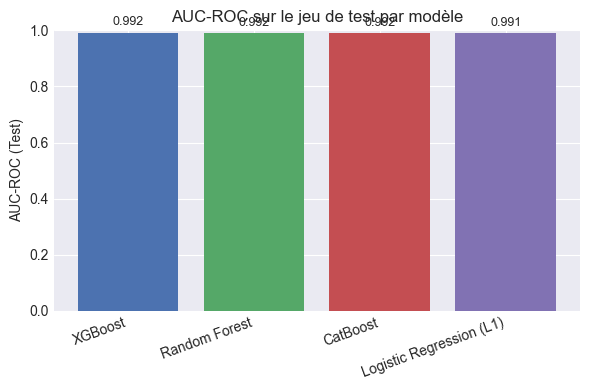

In [129]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4))

#Barres,
bars = plt.bar(
    results_summary["Modèle"],
    results_summary["Test AUC"],
    color=["#4C72B0", "#55A868", "#C44E52", "#8172B3"]
)

plt.ylabel("AUC-ROC (Test)")
plt.title("AUC-ROC sur le jeu de test par modèle")
plt.xticks(rotation=20, ha="right")

#Axe Y plus gradué (par ex. tous les 0.05 ou 0.1),
plt.yticks(np.arange(0.0, 1.01, 0.2))
#Afficher la valeur sur chaque barre,
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f"{height:.3f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

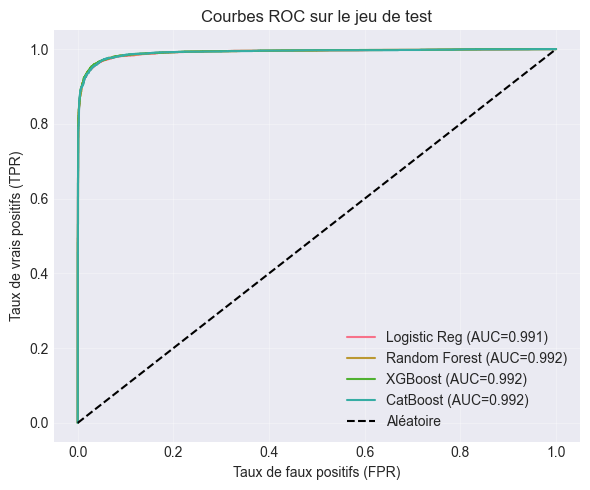

In [130]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

# 1) Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_proba_lr)
auc_lr = roc_auc_score(y_test, y_test_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Reg (AUC={auc_lr:.3f})")

# 2) Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
auc_rf = roc_auc_score(y_test, y_test_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")

# 3) XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_test_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")

# 4) CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_proba_cb_test)
auc_cb = roc_auc_score(y_test, y_proba_cb_test)
plt.plot(fpr_cb, tpr_cb, label=f"CatBoost (AUC={auc_cb:.3f})")

# Diagonale aléatoire
plt.plot([0, 1], [0, 1], "k--", label="Aléatoire")

plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC sur le jeu de test")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()